<a href="https://colab.research.google.com/github/JuanApablaza/DESAFIO_TELECOMMX_LATAM_JA/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extracci√≥n

In [29]:
import pandas as pd
import requests
from pandas import json_normalize

# 1. Extraer los datos del JSON
url = 'https://raw.githubusercontent.com/JuanApablaza/DESAFIO_TELECOMMX_LATAM_JA/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

#üîß Transformaci√≥n

In [9]:


# 2. Crear el DataFrame inicial
df = pd.DataFrame(data)

# 3. Normalizar las columnas que contienen diccionarios
# Normalizar columna 'customer'
customer_norm = json_normalize(df['customer'])

# Normalizar columna 'phone'
phone_norm = json_normalize(df['phone'])

# Normalizar columna 'internet'
internet_norm = json_normalize(df['internet'])

# Normalizar columna 'account'
account_norm = json_normalize(df['account'])

# 4. Combinar todo en un DataFrame normalizado
df_normalized = pd.concat([
    df[['customerID', 'Churn']],  # Columnas que no son diccionarios
    customer_norm,
    phone_norm,
    internet_norm,
    account_norm
], axis=1)

# 5. Mostrar las primeras filas del DataFrame normalizado
print(df_normalized.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [30]:
df_normalized

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ... TechSupport  \
0             Yes                No             DSL  ...         Yes   
1             Yes               Yes             DSL  ...          No   
2             Yes                No     Fiber optic  ...          No   
3             Yes                No     Fiber optic  ...          No   
4             Yes                No     Fiber optic  ...         Yes   
...           ...               ...             ...  ...         ...   
7262          Yes                No             DSL  ...         Yes   
7263          Yes               Yes     Fiber optic  ...          No   
7264          Yes                No             DSL  ...          No   
7265          Yes                No             DSL  ...         Yes   
7266           No  No phone service             DSL  ...          No   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0            Yes              No        One year              Yes   
1             No             Yes  Month-to-month               No   
2             No              No  Month-to-month              Yes   
3            Yes             Yes  Month-to-month              Yes   
4            Yes              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7262          No              No        One year               No   
7263          No             Yes  Month-to-month              Yes   
7264          No              No  Month-to-month              Yes   
7265          No             Yes        Two year               No   
7266         Yes             Yes        Two year               No   

         PaymentMethod Charges.Monthly Charges.Total fecha_ejemplo  \
0         Mailed check           65.60         593.3    2023-01-01   
1         Mailed check           59.90         542.4    2023-01-02   
2     Electronic check           73.90        280.85    2023-01-03   
3     Electronic check           98.00       1237.85    2023-01-04   
4         Mailed check           83.90         267.4    2023-01-05   
...                ...             ...           ...           ...   
7262      Mailed check           55.15         742.9    2042-11-19   
7263  Electronic check           85.10        1873.7    2042-11-20   
7264      Mailed check           50.30         92.75    2042-11-21   
7265      Mailed check           67.85       4627.65    2042-11-22   
7266  Electronic check           59.00        3707.6    2042-11-23   

      fecha_ejemplo_normalizada  
0                    2023-01-01  
1                    2023-01-02  
2                    2023-01-03  
3                    2023-01-04  
4                    2023-01-05  
...                         ...  
7262                 2042-11-19  
7263                 2042-11-20  
7264                 2042-11-21  
7265                 2042-11-22  
7266                 2042-11-23  

[7267 rows x 23 columns]

#üìä Carga y an√°lisis

# **1.Explorar las columnas del dataset y verificar sus tipos de datos.**







In [31]:
# 1.Explorar las columnas del dataset y verificar sus tipos de datos.


def explorar_dataset(df):
    print("=== RESUMEN DEL DATASET ===")
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

    print("\n=== TIPOS DE DATOS ===")
    print(df.dtypes.value_counts())

    print("\n=== COLUMNAS NUM√âRICAS ===")
    num_cols = df.select_dtypes(include=['number']).columns
    print(num_cols)
    if len(num_cols) > 0:
        print("\nEstad√≠sticas descriptivas:")
        print(df[num_cols].describe())



    print("\n=== COLUMNAS CATEG√ìRICAS ===")
    #pandas.unique()
    cat_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns
    print(cat_cols)
    if len(cat_cols) > 0:
        print("\nValores √∫nicos (top 5 por columna):")
        for col in cat_cols:
            print(f"\n{col}:")
            print(df[col].value_counts(dropna=False).head())

    print("\n=== VALORES NULOS ===")
    print(df.isnull().sum().sort_values(ascending=False))

#otra forma de unique



# Usar la funci√≥n
explorar_dataset(df_normalized)
# Versi√≥n resumida para exploraci√≥n r√°pida
for col in df_normalized.columns: # Iterate over the columns of df_normalized
    print(f"\nColumna: {col}")
    print(f"Tipo: {df_normalized[col].dtype}")
    print(f"Valores √∫nicos: {pd.unique(df_normalized[col])}")

=== RESUMEN DEL DATASET ===
Filas: 7267, Columnas: 23

=== TIPOS DE DATOS ===
object            18
int64              2
datetime64[ns]     2
float64            1
Name: count, dtype: int64

=== COLUMNAS NUM√âRICAS ===
Index(['SeniorCitizen', 'tenure', 'Charges.Monthly'], dtype='object')

Estad√≠sticas descriptivas:
       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000

=== COLUMNAS CATEG√ìRICAS ===
Index(['customerID', 'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupp

**Comprobaci√≥n de incoherencias en los datos**
En este paso, verifica si hay problemas en los datos que puedan afectar el an√°lisis. Presta atenci√≥n a valores ausentes, duplicados, errores de formato e inconsistencias en las categor√≠as. Este proceso es esencial para asegurarte de que los datos est√©n listos para las siguientes etapas.

In [32]:
#pandas.unique()
# Versi√≥n resumida para exploraci√≥n r√°pida
for col in df_normalized.columns: # Iterate over the columns of df_normalized
    print(f"\nColumna: {col}")
    print(f"Tipo: {df_normalized[col].dtype}")
    print(f"Valores √∫nicos: {pd.unique(df_normalized[col])}")


Columna: customerID
Tipo: object
Valores √∫nicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
Tipo: object
Valores √∫nicos: ['No' 'Yes' '']

Columna: gender
Tipo: object
Valores √∫nicos: ['Female' 'Male']

Columna: SeniorCitizen
Tipo: int64
Valores √∫nicos: [0 1]

Columna: Partner
Tipo: object
Valores √∫nicos: ['Yes' 'No']

Columna: Dependents
Tipo: object
Valores √∫nicos: ['Yes' 'No']

Columna: tenure
Tipo: int64
Valores √∫nicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Columna: PhoneService
Tipo: object
Valores √∫nicos: ['Yes' 'No']

Columna: MultipleLines
Tipo: object
Valores √∫nicos: ['No' 'Yes' 'No phone service']

Columna: InternetService
Tipo: object
Valores √∫nicos: ['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
Tipo: object
Valores √∫

In [34]:
#pandas.Series.dt.normalize()
import pandas as pd

# 1. Verificar columnas de fecha/hora en tu DataFrame
print("Columnas de fecha/hora en df_normalized:")
date_cols = df_normalized.select_dtypes(include=['datetime64']).columns
print(date_cols.tolist())

# Si no hay columnas datetime, vamos a crear una de ejemplo
if len(date_cols) == 0:
    print("\nNo se encontraron columnas de fecha/hora. Creando columna de ejemplo...")
    df_normalized['fecha_ejemplo'] = pd.date_range(start='2023-01-01', periods=len(df_normalized), freq='D')
    date_cols = ['fecha_ejemplo']

# 2. Aplicar normalize() a cada columna datetime
for col in date_cols:
    print(f"\nNormalizando columna: {col}")
    df_normalized[f'{col}_normalizada'] = df_normalized[col].dt.normalize()

    # Mostrar resultados
    print(df_normalized[[col, f'{col}_normalizada']].head())

# 3. Si necesitas convertir strings a datetime primero:
# Ejemplo para una columna llamada 'fecha_string' (si existe)
if 'fecha_string' in df_normalized.columns:
    df_normalized['fecha_datetime'] = pd.to_datetime(df_normalized['fecha_string'])
    df_normalized['fecha_datetime_normalizada'] = df_normalized['fecha_datetime'].dt.normalize()

Columnas de fecha/hora en df_normalized:
['fecha_ejemplo', 'fecha_ejemplo_normalizada']

Normalizando columna: fecha_ejemplo
  fecha_ejemplo fecha_ejemplo_normalizada
0    2023-01-01                2023-01-01
1    2023-01-02                2023-01-02
2    2023-01-03                2023-01-03
3    2023-01-04                2023-01-04
4    2023-01-05                2023-01-05

Normalizando columna: fecha_ejemplo_normalizada
  fecha_ejemplo_normalizada fecha_ejemplo_normalizada_normalizada
0                2023-01-01                            2023-01-01
1                2023-01-02                            2023-01-02
2                2023-01-03                            2023-01-03
3                2023-01-04                            2023-01-04
4                2023-01-05                            2023-01-05


In [36]:
df_normalized.head(20)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0   0002-ORFBO    No  Female              0     Yes        Yes       9   
1   0003-MKNFE    No    Male              0      No         No       9   
2   0004-TLHLJ   Yes    Male              0      No         No       4   
3   0011-IGKFF   Yes    Male              1     Yes         No      13   
4   0013-EXCHZ   Yes  Female              1     Yes         No       3   
5   0013-MHZWF    No  Female              0      No        Yes       9   
6   0013-SMEOE    No  Female              1     Yes         No      71   
7   0014-BMAQU    No    Male              0     Yes         No      63   
8   0015-UOCOJ    No  Female              1      No         No       7   
9   0016-QLJIS    No  Female              0     Yes        Yes      65   
10  0017-DINOC    No    Male              0      No         No      54   
11  0017-IUDMW    No  Female              0     Yes        Yes      72   
12  0018-NYROU    No  Female              0     Yes         No       5   
13  0019-EFAEP    No  Female              0      No         No      72   
14  0019-GFNTW    No  Female              0      No         No      56   
15  0020-INWCK    No  Female              0     Yes        Yes      71   
16  0020-JDNXP    No  Female              0     Yes        Yes      34   
17  0021-IKXGC    No  Female              1      No         No       1   
18  0022-TCJCI   Yes    Male              1      No         No      45   
19  0023-HGHWL   Yes    Male              1      No         No       1   

   PhoneService     MultipleLines InternetService  ... StreamingTV  \
0           Yes                No             DSL  ...         Yes   
1           Yes               Yes             DSL  ...          No   
2           Yes                No     Fiber optic  ...          No   
3           Yes                No     Fiber optic  ...         Yes   
4           Yes                No     Fiber optic  ...         Yes   
5           Yes                No             DSL  ...         Yes   
6           Yes                No     Fiber optic  ...         Yes   
7           Yes               Yes     Fiber optic  ...          No   
8           Yes                No             DSL  ...          No   
9           Yes               Yes             DSL  ...         Yes   
10           No  No phone service             DSL  ...         Yes   
11          Yes               Yes     Fiber optic  ...         Yes   
12          Yes                No     Fiber optic  ...          No   
13          Yes               Yes     Fiber optic  ...         Yes   
14           No  No phone service             DSL  ...          No   
15          Yes               Yes     Fiber optic  ...          No   
16           No  No phone service             DSL  ...         Yes   
17          Yes               Yes     Fiber optic  ...          No   
18          Yes                No             DSL  ...          No   
19           No  No phone service             DSL  ...          No   

   StreamingMovies        Contract PaperlessBilling  \
0               No        One year              Yes   
1              Yes  Month-to-month               No   
2               No  Month-to-month              Yes   
3              Yes  Month-to-month              Yes   
4               No  Month-to-month              Yes   
5              Yes  Month-to-month              Yes   
6              Yes        Two year              Yes   
7               No        Two year              Yes   
8               No  Month-to-month              Yes   
9              Yes        Two year              Yes   
10              No        Two year               No   
11             Yes        Two year              Yes   
12              No  Month-to-month              Yes   
13              No        Two year              Yes   
14              No        Two year               No   
15             Yes        Two year              Yes   
16             Yes        One year         

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que est√©n completos y coherentes, prepar√°ndolos para las siguientes etapas del an√°lisis.

# **2.Consultar el diccionario para comprender mejor el significado de las variables.** **texto en negrita**



### **Diccionario de datos**#

**https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_diccionario.md**

customerID: n√∫mero de identificaci√≥n √∫nico de cada cliente
Churn: si el cliente dej√≥ o no la empresa
gender: g√©nero (masculino y femenino)
SeniorCitizen: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
Partner: si el cliente tiene o no una pareja
Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
PhoneService: suscripci√≥n al servicio telef√≥nico
MultipleLines: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
InternetService: suscripci√≥n a un proveedor de internet
OnlineSecurity: suscripci√≥n adicional de seguridad en l√≠nea
OnlineBackup: suscripci√≥n adicional de respaldo en l√≠nea
DeviceProtection: suscripci√≥n adicional de protecci√≥n del dispositivo
TechSupport: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
StreamingTV: suscripci√≥n de televisi√≥n por cable
StreamingMovies: suscripci√≥n de streaming de pel√≠culas
Contract: tipo de contrato
PaperlessBilling: si el cliente prefiere recibir la factura en l√≠nea
PaymentMethod: forma de pago
Charges.Monthly: total de todos los servicios del cliente por mes
Charges.Total: total gastado por el cliente

# **3.Identificar las columnas m√°s relevantes para el an√°lisis de evasi√≥n.**

Promt : cuales con las  columnas m√°s relevantes para el an√°lisis de evasi√≥n ?

Respuesta Chat GPT:
Columnas relevantes para el an√°lisis de evasi√≥n (Churn)
Bas√°ndome en el dataset de telecomunicaciones que est√°s analizando, estas son las columnas m√°s relevantes para predecir o analizar el Churn (abandono/evasi√≥n de clientes), agrupadas por categor√≠as:

1. Columnas fundamentales (obligatorias)
Churn: La variable objetivo (S√≠/No) que indica si el cliente abandon√≥ el servicio

customerID: Identificador √∫nico del cliente (√∫til para tracking pero no para modelado)

2. Datos demogr√°ficos del cliente (pueden indicar patrones)
gender: G√©nero (posibles diferencias en comportamiento)

SeniorCitizen: Si es adulto mayor (1) o no (0) - grupo de alto riesgo

Partner: Si tiene pareja (puede afectar decisiones econ√≥micas)

Dependents: Si tiene dependientes (afecta capacidad de pago)

3. Informaci√≥n de servicios contratados (predictores clave)
PhoneService: Si tiene servicio telef√≥nico

MultipleLines: Si tiene m√∫ltiples l√≠neas

InternetService: Tipo de servicio (DSL, Fibra √≥ptica, No)

OnlineSecurity: Contrat√≥ seguridad online (clientes con seguridad suelen tener menos Churn)

OnlineBackup: Backup online

DeviceProtection: Protecci√≥n de dispositivo

TechSupport: Soporte t√©cnico

StreamingTV y StreamingMovies: Servicios de streaming

4. Informaci√≥n de facturaci√≥n y contrato (predictores fuertes)
Contract: Tipo de contrato (Mes a mes, 1 a√±o, 2 a√±os) - El m√°s importante

PaperlessBilling: Factura electr√≥nica (puede asociarse a mayor Churn)

PaymentMethod: M√©todo de pago (p.ej. transferencia electr√≥nica suele tener m√°s Churn)

MonthlyCharges: Cargos mensuales (clientes con cargos altos m√°s propensos a irse)

TotalCharges: Cargos totales (clientes con mucha inversi√≥n previa menos propensos)

5. Columnas calculadas potencialmente √∫tiles
Tenure (si est√° disponible): Antig√ºedad del cliente en meses

ChargeRatio: MonthlyCharges/TotalCharges (podr√≠as crear esta feature)

Columnas menos relevantes para Churn:
customerID: Solo identificador

customer_... (datos muy b√°sicos sin poder predictivo demostrado)

An√°lisis recomendado:

In [15]:
#An√°lisis recomendado:
# Filtrar solo columnas relevantes
# Columnas relevantes ajustadas a lo que probablemente tienes
churn_columns = [
    'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

# Agregamos las columnas de cargos si existen con otros nombres
possible_charge_columns = ['MonthlyCharges', 'TotalCharges', 'account_MonthlyCharges', 'account_TotalCharges']

for col in possible_charge_columns:
    if col in df_normalized.columns:
        churn_columns.append(col)

# Ahora creamos el DataFrame de an√°lisis
df_churn = df_normalized[churn_columns]

# Verificamos
print("\nColumnas seleccionadas para an√°lisis de Churn:")
print(df_churn.columns.tolist())


Columnas seleccionadas para an√°lisis de Churn:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


# **Manejo de inconsistencias**

In [37]:
#Promt : deseo en el df_normalized reemplazar el valor "No phone service" a "No" en la columna MultipleLines
df_normalized['MultipleLines'] = df_normalized['MultipleLines'].apply(
    lambda x: "No" if x == "No phone service" else x
)

# Verificar
print(df_normalized['MultipleLines'].unique())

['No' 'Yes']


In [ ]:
#üìä Carga y an√°lisis(L - Load & Analysis)

# **An√°lisis Descriptivo**
Para comenzar, realiza un an√°lisis descriptivo de los datos, calculando m√©tricas como media, mediana, desviaci√≥n est√°ndar y otras medidas que ayuden a comprender mejor la distribuci√≥n y el comportamiento de los clientes.

üìå Consejos:

üîó Documentaci√≥n de DataFrame.describe()

In [ ]:
#Promt : An√°lisis Descriptivo
#Para comenzar, realiza un an√°lisis descriptivo de los datos, calculando m√©tricas como media, mediana, desviaci√≥n est√°ndar
# y otras medidas que ayuden a comprender mejor la distribuci√≥n y el comportamiento de los clientes.

#Vamos a realizar un an√°lisis descriptivo completo del DataFrame df_normalized, enfoc√°ndonos en m√©tricas clave para entender la
#distribuci√≥n y comportamiento de los clientes, especialmente en relaci√≥n con el Churn (abandono).

In [39]:
#1. An√°lisis General del DataFrame
#python
# Ver estructura del dataset
print(f"Filas: {df_normalized.shape[0]}, Columnas: {df_normalized.shape[1]}")
print("\nTipos de datos por columna:")
print(df_normalized.dtypes.value_counts())

# Resumen r√°pido de variables num√©ricas y categ√≥ricas
print("\nResumen estad√≠stico de variables num√©ricas:")
print(df_normalized.describe(include=['int64', 'float64']))

print("\nResumen de variables categ√≥ricas:")
print(df_normalized.describe(include=['object', 'bool']))

Filas: 7267, Columnas: 24

Tipos de datos por columna:
object            18
datetime64[ns]     3
int64              2
float64            1
Name: count, dtype: int64

Resumen estad√≠stico de variables num√©ricas:
       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000

Resumen de variables categ√≥ricas:
        customerID Churn gender Partner Dependents PhoneService MultipleLines  \
count         7267  7267   7267    7267       7267         7267          7267   
unique        7267     3      2       2          2            2             2   
top     9995-HOTOH    No   Male      No         No

In [46]:
#2. An√°lisis de Variables Num√©ricas
#M√©tricas clave: media, mediana, desviaci√≥n est√°ndar, rangos
#python
numeric_cols = df_normalized.select_dtypes(include=['int64', 'float64']).columns

if not numeric_cols.empty:
    print("\nAn√°lisis detallado de variables num√©ricas:")
    stats_df = df_normalized[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max', 'skew'])
    print(stats_df)
else:
    print("\nNo hay columnas num√©ricas para analizar.")


An√°lisis detallado de variables num√©ricas:
        SeniorCitizen     tenure  Charges.Monthly
mean         0.162653  32.346498        64.720098
median       0.000000  29.000000        70.300000
std          0.369074  24.571773        30.129572
min          0.000000   0.000000        18.250000
max          1.000000  72.000000       118.750000
skew         1.828574   0.239523        -0.216539


In [45]:
#3. An√°lisis de Variables Categ√≥ricas
#Distribuci√≥n de frecuencias y moda
#python
categorical_cols = df_normalized.select_dtypes(include=['object', 'bool']).columns

if not categorical_cols.empty:
    print("\nDistribuci√≥n de variables categ√≥ricas:")
    for col in categorical_cols:
        print(f"\nüîπ Columna: {col}")
        print(df_normalized[col].value_counts(normalize=True) * 100)  # Porcentajes
else:
    print("\nNo hay columnas categ√≥ricas para analizar.")


Distribuci√≥n de variables categ√≥ricas:

üîπ Columna: customerID
customerID
9995-HOTOH    0.013761
0002-ORFBO    0.013761
0003-MKNFE    0.013761
9970-QBCDA    0.013761
9968-FFVVH    0.013761
                ...   
0014-BMAQU    0.013761
0013-SMEOE    0.013761
0013-MHZWF    0.013761
0013-EXCHZ    0.013761
0011-IGKFF    0.013761
Name: proportion, Length: 7267, dtype: float64

üîπ Columna: Churn
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64

üîπ Columna: gender
gender
Male      50.571075
Female    49.428925
Name: proportion, dtype: float64

üîπ Columna: Partner
Partner
No     51.589377
Yes    48.410623
Name: proportion, dtype: float64

üîπ Columna: Dependents
Dependents
No     69.987615
Yes    30.012385
Name: proportion, dtype: float64

üîπ Columna: PhoneService
PhoneService
Yes    90.271088
No      9.728912
Name: proportion, dtype: float64

üîπ Columna: MultipleLines
MultipleLines
No     57.823036
Yes    42.176964
Name: proportion, dty

In [43]:
#4. An√°lisis Comparativo por Churn
#¬øC√≥mo difieren las m√©tricas entre clientes que se van y los que se quedan?
#python
if 'Churn' in df_normalized.columns:
    print("\nComparaci√≥n entre clientes que abandonan (Churn=Yes) vs los que no (Churn=No):")

    # Para variables num√©ricas
    if not numeric_cols.empty:
        print("\nüî¢ Estad√≠sticas por Churn (num√©ricas):")
        print(df_normalized.groupby('Churn')[numeric_cols].agg(['mean', 'median', 'std']))

    # Para variables categ√≥ricas
    if not categorical_cols.empty:
        print("\nüìä Distribuci√≥n categ√≥rica por Churn (%):")
        for col in categorical_cols:
            if col != 'Churn':
                print(f"\n{col}:")
                print(pd.crosstab(df_normalized['Churn'], df_normalized[col], normalize='columns') * 100)
else:
    print("\nNo se encontr√≥ la columna 'Churn' en el DataFrame.")


Comparaci√≥n entre clientes que abandonan (Churn=Yes) vs los que no (Churn=No):

üî¢ Estad√≠sticas por Churn (num√©ricas):
      SeniorCitizen                      tenure                    \
               mean median       std       mean median        std   
Churn                                                               
           0.178571    0.0  0.383851  31.571429   29.0  24.998552   
No         0.128721    0.0  0.334923  37.569965   38.0  24.113777   
Yes        0.254682    0.0  0.435799  17.979133   10.0  19.531123   

      Charges.Monthly                     
                 mean  median        std  
Churn                                     
            63.412277  69.100  31.388712  
No          61.265124  64.425  31.092648  
Yes         74.441332  79.650  24.666053  

üìä Distribuci√≥n categ√≥rica por Churn (%):

customerID:
customerID  0002-ORFBO  0003-MKNFE  0004-TLHLJ  0011-IGKFF  0013-EXCHZ  \
Churn                                                               

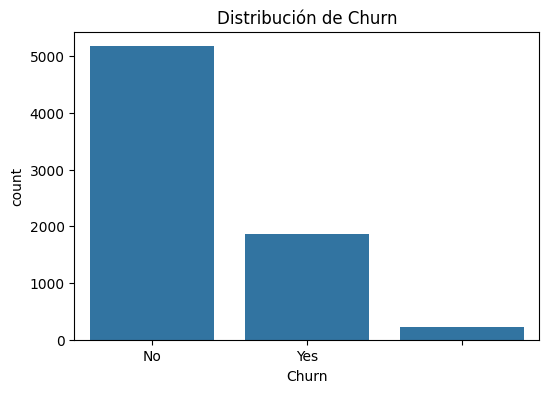

In [44]:
#5. Visualizaci√≥n de Datos (Opcional)
#python
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo: Distribuci√≥n de Churn
if 'Churn' in df_normalized.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_normalized, x='Churn')
    plt.title("Distribuci√≥n de Churn")
    plt.show()

# Ejemplo: Boxplot de MonthlyCharges por Churn
if 'MonthlyCharges' in df_normalized.columns and 'Churn' in df_normalized.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_normalized, x='Churn', y='MonthlyCharges')
    plt.title("Cargos mensuales vs Churn")
    plt.show()

# **Recuento de evasi√≥n por variables categ√≥ricas**
Ahora, exploraremos c√≥mo se distribuye la evasi√≥n seg√∫n variables categ√≥ricas, como g√©nero, tipo de contrato, m√©todo de pago, entre otras.

Este an√°lisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudar√° a orientar acciones estrat√©gicas.


In [48]:
#Recuento de Evasi√≥n (Churn) por Variables Categ√≥ricas
#A continuaci√≥n, analizaremos c√≥mo se distribuye el Churn en funci√≥n de las principales variables categ√≥ricas del dataset. Esto nos permitir√° identificar qu√© grupos de clientes tienen mayor probabilidad de abandonar el servicio.

#1. Preparaci√≥n de los Datos
#python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegur√©monos de que 'Churn' est√° en formato binario para c√°lculos
df_normalized['Churn_bin'] = df_normalized['Churn'].map({'Yes': 1, 'No': 0})

# Lista de variables categ√≥ricas clave para analizar
categorical_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

# Filtramos solo las columnas que existen en el DataFrame
categorical_vars = [var for var in categorical_vars if var in df_normalized.columns]

üìä Porcentaje de Evasi√≥n (Churn) por Variable Categ√≥rica:


üîπ gender:
gender
Female    26.9%
Male      26.2%
Name: Churn_bin, dtype: object


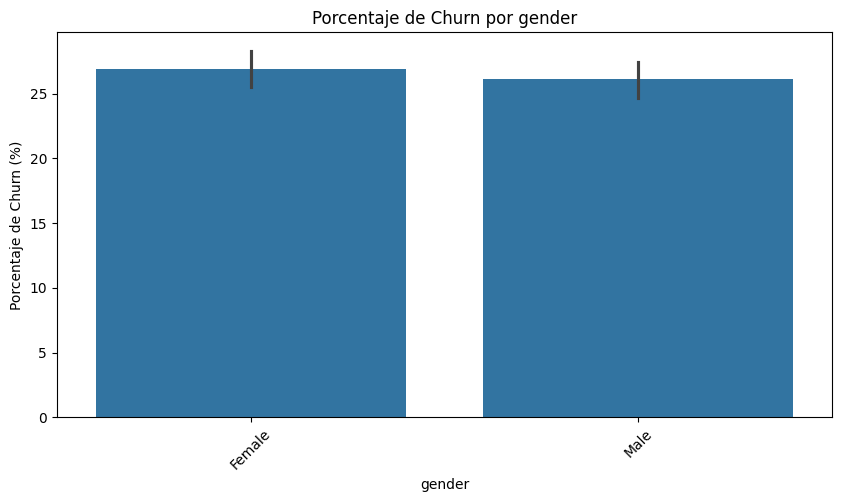


üîπ SeniorCitizen:
SeniorCitizen
1    41.7%
0    23.6%
Name: Churn_bin, dtype: object


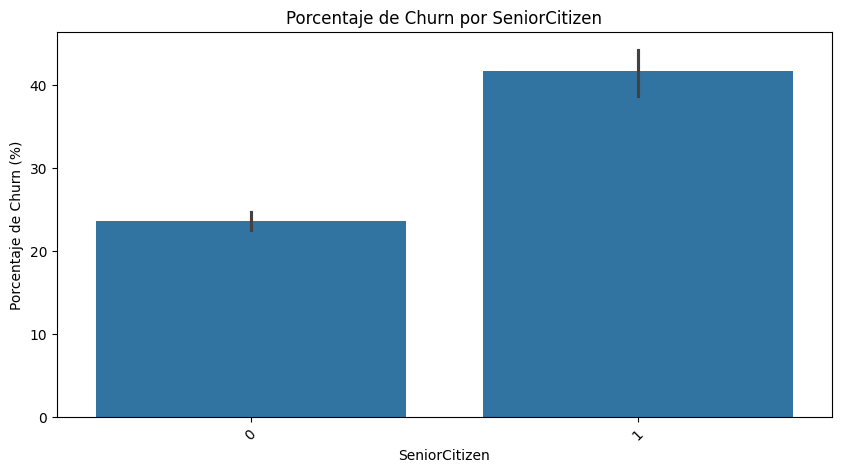


üîπ Partner:
Partner
No     33.0%
Yes    19.7%
Name: Churn_bin, dtype: object


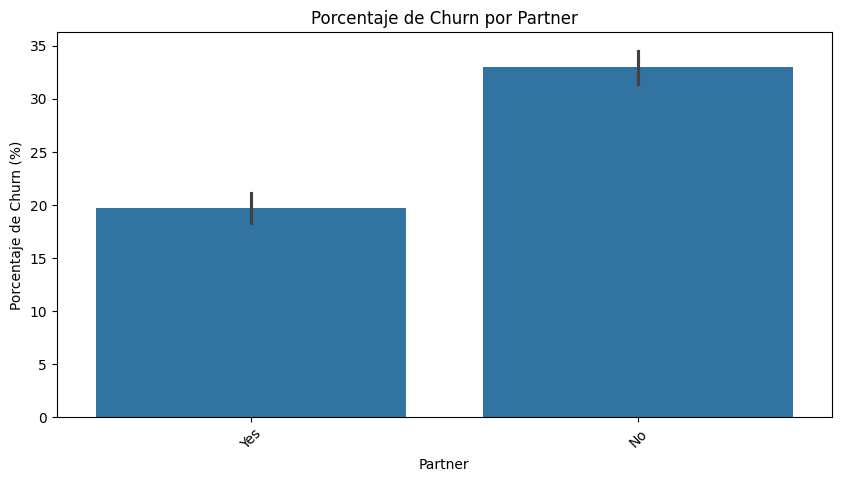


üîπ Dependents:
Dependents
No     31.3%
Yes    15.5%
Name: Churn_bin, dtype: object


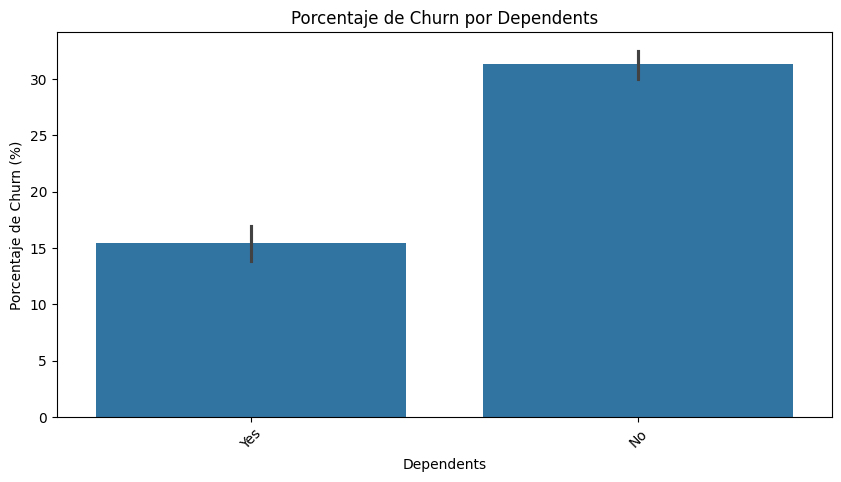


üîπ PhoneService:
PhoneService
Yes    26.7%
No     24.9%
Name: Churn_bin, dtype: object


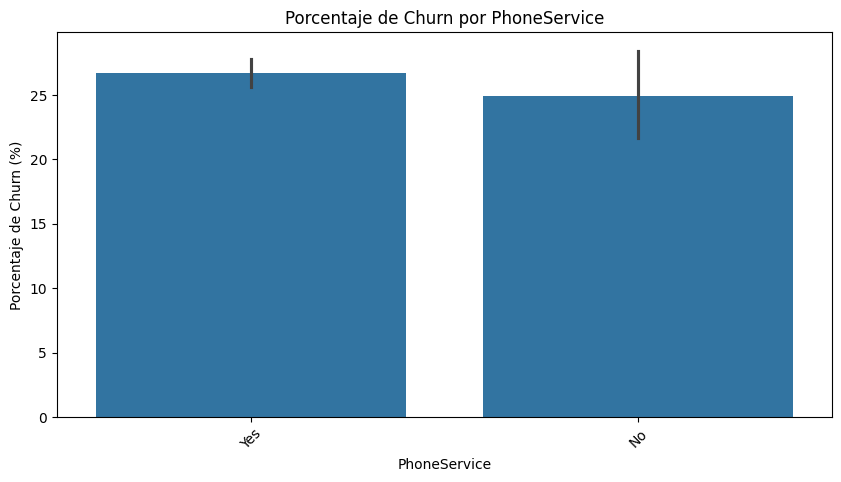


üîπ MultipleLines:
MultipleLines
Yes    28.6%
No     25.0%
Name: Churn_bin, dtype: object


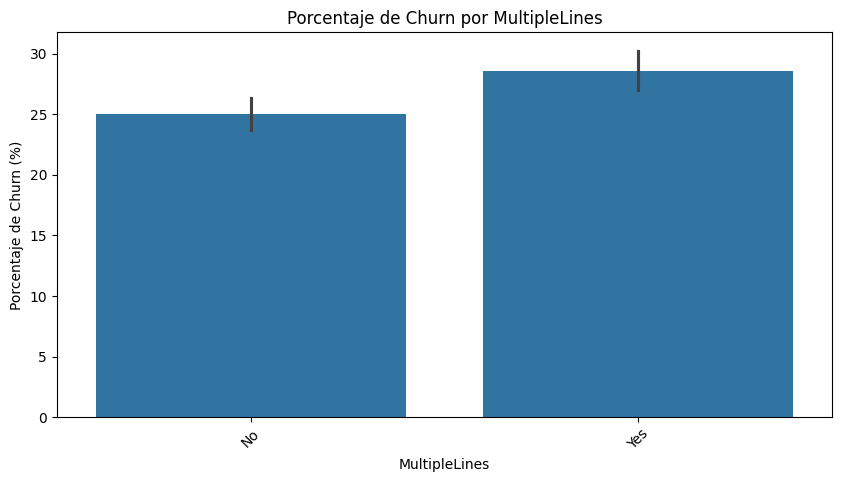


üîπ InternetService:
InternetService
Fiber optic    41.9%
DSL            19.0%
No              7.4%
Name: Churn_bin, dtype: object


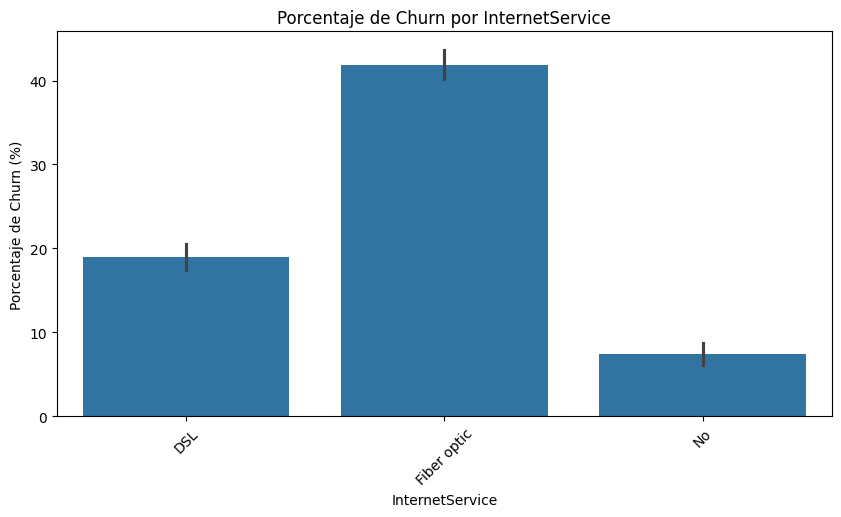


üîπ OnlineSecurity:
OnlineSecurity
No                     41.8%
Yes                    14.6%
No internet service     7.4%
Name: Churn_bin, dtype: object


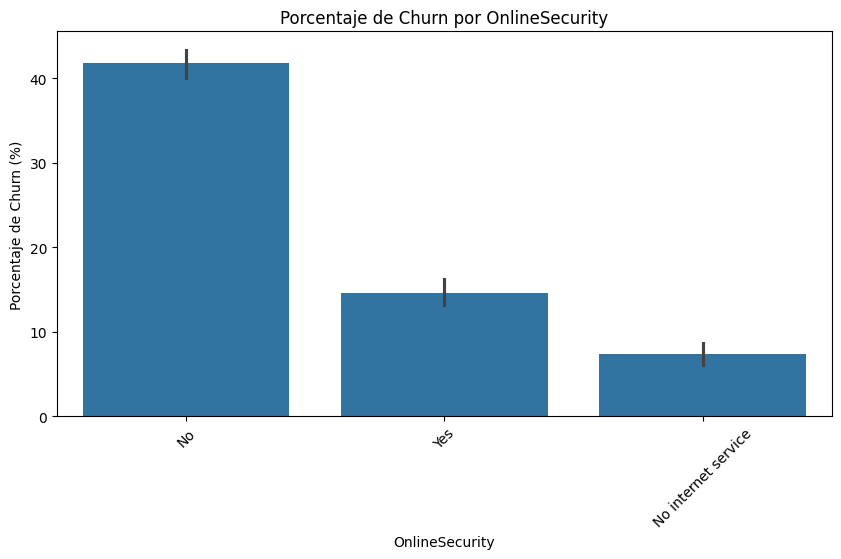


üîπ OnlineBackup:
OnlineBackup
No                     39.9%
Yes                    21.5%
No internet service     7.4%
Name: Churn_bin, dtype: object


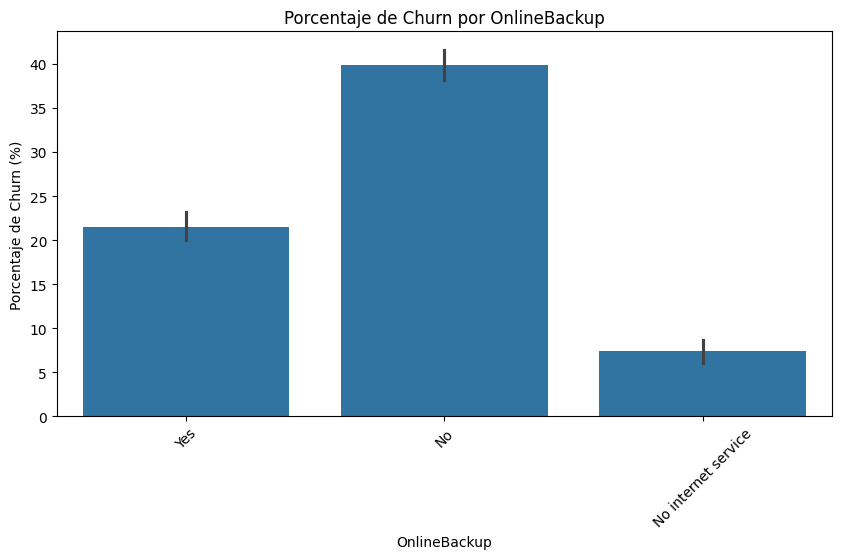


üîπ DeviceProtection:
DeviceProtection
No                     39.1%
Yes                    22.5%
No internet service     7.4%
Name: Churn_bin, dtype: object


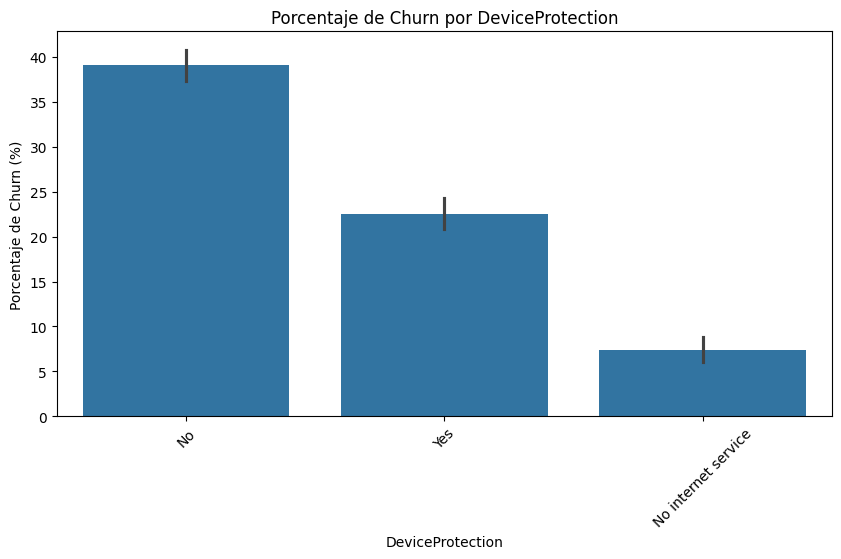


üîπ TechSupport:
TechSupport
No                     41.6%
Yes                    15.2%
No internet service     7.4%
Name: Churn_bin, dtype: object


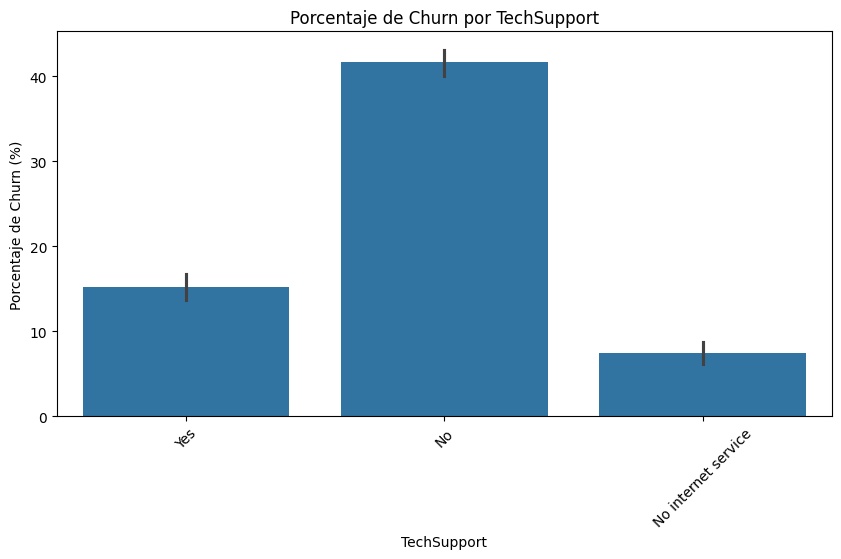


üîπ StreamingTV:
StreamingTV
No                     33.5%
Yes                    30.1%
No internet service     7.4%
Name: Churn_bin, dtype: object


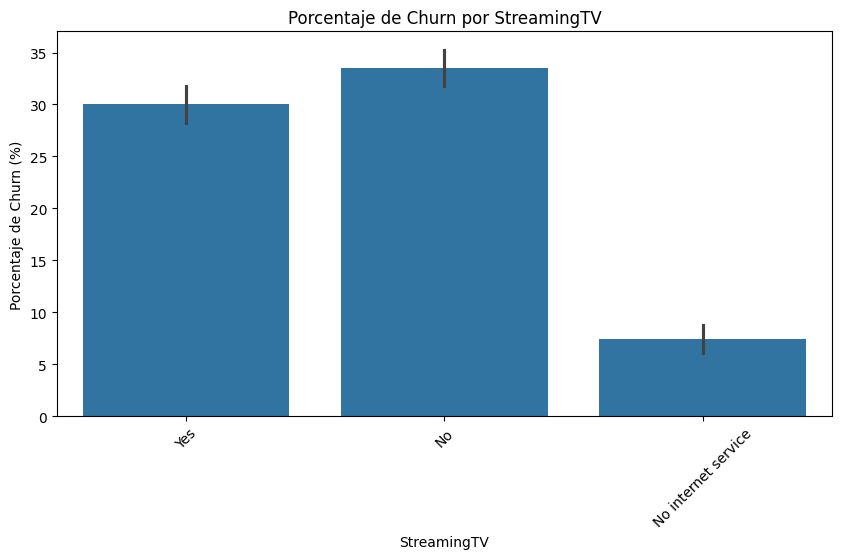


üîπ StreamingMovies:
StreamingMovies
No                     33.7%
Yes                    29.9%
No internet service     7.4%
Name: Churn_bin, dtype: object


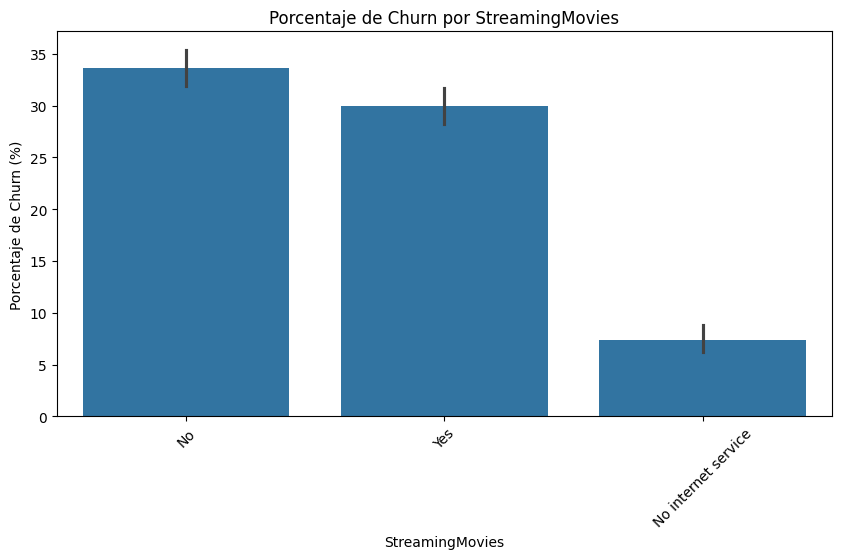


üîπ Contract:
Contract
Month-to-month    42.7%
One year          11.3%
Two year           2.8%
Name: Churn_bin, dtype: object


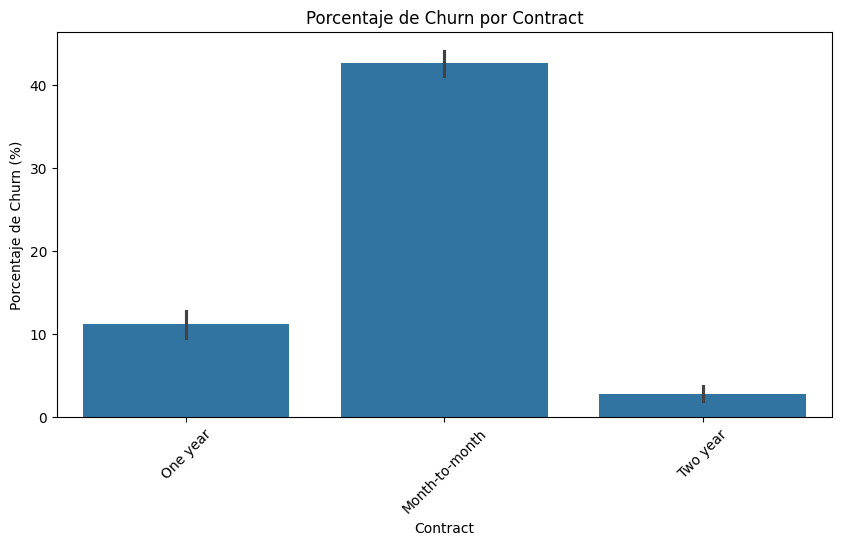


üîπ PaperlessBilling:
PaperlessBilling
Yes    33.6%
No     16.3%
Name: Churn_bin, dtype: object


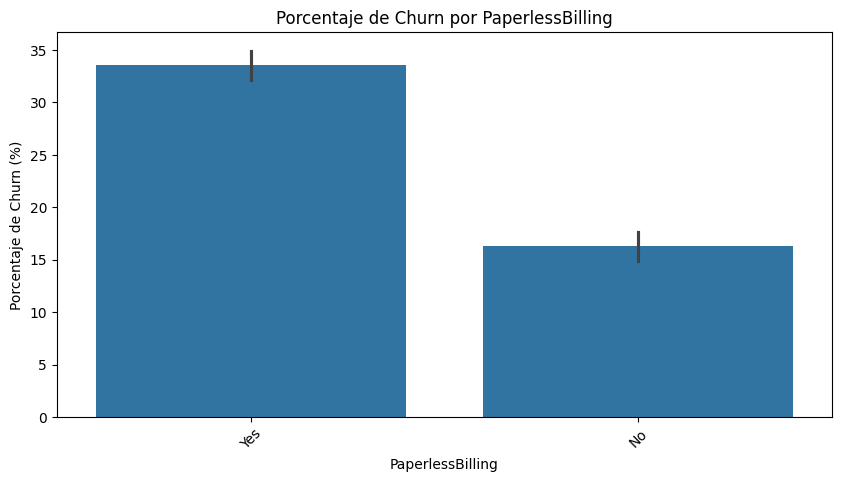


üîπ PaymentMethod:
PaymentMethod
Electronic check             45.3%
Mailed check                 19.1%
Bank transfer (automatic)    16.7%
Credit card (automatic)      15.2%
Name: Churn_bin, dtype: object


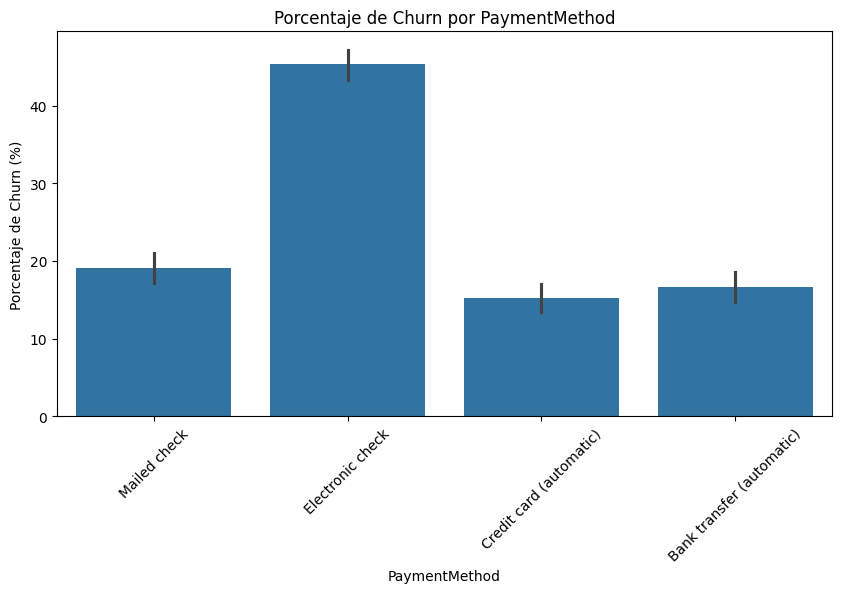

In [49]:
#2. An√°lisis de Porcentaje de Churn por Categor√≠a
#python
print("üìä Porcentaje de Evasi√≥n (Churn) por Variable Categ√≥rica:\n")

for var in categorical_vars:
    # Calculamos el porcentaje de Churn por categor√≠a
    churn_rate = df_normalized.groupby(var)['Churn_bin'].mean() * 100

    print(f"\nüîπ {var}:")
    print(churn_rate.sort_values(ascending=False).round(1).astype(str) + "%")

    # Gr√°fico de barras
    plt.figure(figsize=(10, 5))
    sns.barplot(x=var, y='Churn_bin', data=df_normalized, estimator=lambda x: sum(x)*100/len(x))
    plt.title(f'Porcentaje de Churn por {var}')
    plt.ylabel('Porcentaje de Churn (%)')
    plt.xticks(rotation=45)
    plt.show()

In [50]:
#4. Tabla Resumen de Churn por Categor√≠a
#python
# Creamos un resumen en DataFrame
churn_summary = pd.DataFrame()

for var in categorical_vars:
    temp_df = df_normalized.groupby(var)['Churn_bin'].agg(['mean', 'count'])
    temp_df['mean'] = temp_df['mean'] * 100  # Convertir a porcentaje
    temp_df = temp_df.rename(columns={'mean': 'Churn Rate (%)', 'count': 'Clientes'})
    temp_df.reset_index(inplace=True)
    temp_df['Variable'] = var
    churn_summary = pd.concat([churn_summary, temp_df])

# Mostramos las 10 categor√≠as con mayor Churn
print("\nüîù Top 10 Categor√≠as con Mayor Porcentaje de Churn:")
print(churn_summary.sort_values('Churn Rate (%)', ascending=False).head(10).to_string(index=False))


üîù Top 10 Categor√≠as con Mayor Porcentaje de Churn:
gender  Churn Rate (%)  Clientes         Variable  SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies       Contract PaperlessBilling    PaymentMethod
   NaN       45.285412      2365    PaymentMethod            NaN     NaN        NaN          NaN           NaN             NaN            NaN          NaN              NaN         NaN         NaN             NaN            NaN              NaN Electronic check
   NaN       42.709677      3875         Contract            NaN     NaN        NaN          NaN           NaN             NaN            NaN          NaN              NaN         NaN         NaN             NaN Month-to-month              NaN              NaN
   NaN       41.892765      3096  InternetService            NaN     NaN        NaN          NaN           NaN     Fiber optic            NaN          NaN       

# **Conteo de evasi√≥n por variables num√©ricas**

Promt"En este paso, explora c√≥mo las variables num√©ricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasi√≥n) y los que no cancelaron.

Este an√°lisis ayuda a entender si ciertos valores num√©ricos est√°n m√°s asociados con la evasi√≥n, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes."



In [52]:
#Conteo de Evasi√≥n por Variables Num√©ricas
#A continuaci√≥n, analizaremos c√≥mo se distribuyen las variables num√©ricas entre clientes que cancelaron (Churn=Yes) y los que permanecieron (Churn=No). Esto nos ayudar√° a identificar patrones num√©ricos asociados con la evasi√≥n.


In [62]:
#1. Preparaci√≥n de los Datos
#python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegur√©monos de que 'Churn' est√° en formato binario para c√°lculos
df_normalized['Churn_bin'] = df_normalized['Churn'].map({'Yes': 1, 'No': 0})

# Lista de variables categ√≥ricas clave para analizar
categorical_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

# Filtramos solo las columnas que existen en el DataFrame
categorical_vars = [var for var in categorical_vars if var in df_normalized.columns]

In [64]:
#2. An√°lisis de Porcentaje de Churn por Categor√≠a

print("üìä Porcentaje de Evasi√≥n (Churn) por Variable Categ√≥rica:\n")

for var in categorical_vars:
    # Calculamos el porcentaje de Churn por categor√≠a
    churn_rate = df_normalized.groupby(var)['Churn_bin'].mean() * 100

    print(f"\nüîπ {var}:")
    print(churn_rate.sort_values(ascending=False).round(1).astype(str) + "%")

    # Gr√°fico de barras
    #plt.figure(figsize=(10, 5))
    #sns.barplot(x=var, y='Churn_bin', data=df_normalized, estimator=lambda x: sum(x)*100/len(x))
    #plt.title(f'Porcentaje de Churn por {var}')
    #plt.ylabel('Porcentaje de Churn (%)')
    #plt.xticks(rotation=45)
    #plt.show()

üìä Porcentaje de Evasi√≥n (Churn) por Variable Categ√≥rica:


üîπ gender:
gender
Female    26.9%
Male      26.2%
Name: Churn_bin, dtype: object

üîπ SeniorCitizen:
SeniorCitizen
1    41.7%
0    23.6%
Name: Churn_bin, dtype: object

üîπ Partner:
Partner
No     33.0%
Yes    19.7%
Name: Churn_bin, dtype: object

üîπ Dependents:
Dependents
No     31.3%
Yes    15.5%
Name: Churn_bin, dtype: object

üîπ PhoneService:
PhoneService
Yes    26.7%
No     24.9%
Name: Churn_bin, dtype: object

üîπ MultipleLines:
MultipleLines
Yes    28.6%
No     25.0%
Name: Churn_bin, dtype: object

üîπ InternetService:
InternetService
Fiber optic    41.9%
DSL            19.0%
No              7.4%
Name: Churn_bin, dtype: object

üîπ OnlineSecurity:
OnlineSecurity
No                     41.8%
Yes                    14.6%
No internet service     7.4%
Name: Churn_bin, dtype: object

üîπ OnlineBackup:
OnlineBackup
No                     39.9%
Yes                    21.5%
No internet service     7.4%
Name: Chu

In [65]:
# Creamos un resumen en DataFrame
churn_summary = pd.DataFrame()

for var in categorical_vars:
    temp_df = df_normalized.groupby(var)['Churn_bin'].agg(['mean', 'count'])
    temp_df['mean'] = temp_df['mean'] * 100  # Convertir a porcentaje
    temp_df = temp_df.rename(columns={'mean': 'Churn Rate (%)', 'count': 'Clientes'})
    temp_df.reset_index(inplace=True)
    temp_df['Variable'] = var
    churn_summary = pd.concat([churn_summary, temp_df])

# Mostramos las 10 categor√≠as con mayor Churn
print("\nüîù Top 10 Categor√≠as con Mayor Porcentaje de Churn:")
print(churn_summary.sort_values('Churn Rate (%)', ascending=False).head(10).to_string(index=False))


üîù Top 10 Categor√≠as con Mayor Porcentaje de Churn:
gender  Churn Rate (%)  Clientes         Variable  SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies       Contract PaperlessBilling    PaymentMethod
   NaN       45.285412      2365    PaymentMethod            NaN     NaN        NaN          NaN           NaN             NaN            NaN          NaN              NaN         NaN         NaN             NaN            NaN              NaN Electronic check
   NaN       42.709677      3875         Contract            NaN     NaN        NaN          NaN           NaN             NaN            NaN          NaN              NaN         NaN         NaN             NaN Month-to-month              NaN              NaN
   NaN       41.892765      3096  InternetService            NaN     NaN        NaN          NaN           NaN     Fiber optic            NaN          NaN       

In [66]:
# Versi√≥n con conteo de clientes por categor√≠a
churn_summary_list = []

for var in categorical_vars:
    # Calcular porcentaje y conteo
    churn_stats = df_normalized.groupby(var)['Churn_bin'].agg(['mean', 'count'])
    churn_stats['mean'] = churn_stats['mean'] * 100

    # Crear DataFrame temporal
    temp_df = churn_stats.reset_index()
    temp_df.columns = ['Categor√≠a', 'Porcentaje_Churn', 'Total_Clientes']
    temp_df['Variable'] = var

    churn_summary_list.append(temp_df)

# Concatenar y ordenar
churn_summary_df = pd.concat(churn_summary_list, ignore_index=True)
churn_summary_df = churn_summary_df.sort_values('Porcentaje_Churn', ascending=False)

# Formatear
churn_summary_df['Porcentaje_Churn'] = churn_summary_df['Porcentaje_Churn'].round(1).astype(str) + '%'

# Mostrar
print("üìä Resumen Detallado de Churn por Categor√≠a:")
display(churn_summary_df[['Variable', 'Categor√≠a', 'Porcentaje_Churn', 'Total_Clientes']].reset_index(drop=True))

üìä Resumen Detallado de Churn por Categor√≠a:


Variable                  Categor√≠a Porcentaje_Churn  \
0      PaymentMethod           Electronic check            45.3%   
1           Contract             Month-to-month            42.7%   
2    InternetService                Fiber optic            41.9%   
3     OnlineSecurity                         No            41.8%   
4      SeniorCitizen                          1            41.7%   
5        TechSupport                         No            41.6%   
6       OnlineBackup                         No            39.9%   
7   DeviceProtection                         No            39.1%   
8    StreamingMovies                         No            33.7%   
9   PaperlessBilling                        Yes            33.6%   
10       StreamingTV                         No            33.5%   
11           Partner                         No            33.0%   
12        Dependents                         No            31.3%   
13       StreamingTV                        Yes            30.1%   
14   StreamingMovies                        Yes            29.9%   
15     MultipleLines                        Yes            28.6%   
16            gender                     Female            26.9%   
17      PhoneService                        Yes            26.7%   
18            gender                       Male            26.2%   
19     MultipleLines                         No            25.0%   
20      PhoneService                         No            24.9%   
21     SeniorCitizen                          0            23.6%   
22  DeviceProtection                        Yes            22.5%   
23      OnlineBackup                        Yes            21.5%   
24           Partner                        Yes            19.7%   
25     PaymentMethod               Mailed check            19.1%   
26   InternetService                        DSL            19.0%   
27     PaymentMethod  Bank transfer (automatic)            16.7%   
28  PaperlessBilling                         No            16.3%   
29        Dependents                        Yes            15.5%   
30     PaymentMethod    Credit card (automatic)            15.2%   
31       TechSupport                        Yes            15.2%   
32    OnlineSecurity                        Yes            14.6%   
33          Contract                   One year            11.3%   
34       TechSupport        No internet service             7.4%   
35  DeviceProtection        No internet service             7.4%   
36      OnlineBackup        No internet service             7.4%   
37    OnlineSecurity        No internet service             7.4%   
38   InternetService                         No             7.4%   
39       StreamingTV        No internet service             7.4%   
40   StreamingMovies        No internet service             7.4%   
41          Contract                   Two year             2.8%   

    Total_Clientes  
0             2365  
1             3875  
2             3096  
3             3498  
4             1142  
5             3473  
6             3088  
7             3095  
8             2785  
9             4171  
10            2810  
11            3641  
12            4933  
13            2707  
14            2732  
15            2971  
16            3488  
17            6361  
18            3555  
19            4072  
20             682  
21            5901  
22            2422  
23            2429  
24            3402  
25            1612  
26            2421  
27            1544  
28            2872  
29            2110  
30            1522  
31            2044  
32            2019  
33            1473  
34            1526  
35            1526  
36            1526  
37            1526  
38            1526  
39            1526  
40            1526  
41            1695

5. Interpretaci√≥n de Resultados
Variables con Churn > 30% son de alto riesgo y deben priorizarse en estrategias de retenci√≥n.

Variables con Churn < 10% representan clientes estables (ej: contratos anuales).

Variables con muchos clientes pero Churn medio (ej: InternetService=Fiber optic) requieren atenci√≥n inmediata por volumen.

6. Recomendaciones Accionables
Enfoque en contratos mensuales: Ofrecer incentivos para migrar a planes anuales.

Clientes con fibra √≥ptica: Revisar calidad del servicio/expectativas.

Quienes pagan con electronic check: Implementar recordatorios de pago autom√°ticos.

# **INFORME FINAL**


inaliza el desaf√≠o elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

üîπ Introducci√≥n: Explica el objetivo del an√°lisis y el problema de evasi√≥n de clientes (Churn).

üîπ Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

üîπ An√°lisis Exploratorio de Datos: Presenta los an√°lisis realizados, incluyendo gr√°ficos y visualizaciones para identificar patrones.

üîπ Conclusiones e Insights: Resume los principales hallazgos y c√≥mo estos datos pueden ayudar a reducir la evasi√≥n.

üîπ Recomendaciones: Ofrece sugerencias estrat√©gicas basadas en tu an√°lisis.

Aseg√∫rate de que el informe est√© bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. üöÄ

# **Introducci√≥n: Explica el objetivo del an√°lisis y el problema de evasi√≥n de clientes (Churn)**


**Introducci√≥n**


En el competitivo mercado de las telecomunicaciones, la retenci√≥n de clientes es un factor cr√≠tico para el √©xito empresarial. El Churn (o tasa de evasi√≥n) representa el porcentaje de clientes que deciden cancelar su servicio en un per√≠odo determinado. Este fen√≥meno impacta directamente en:

**üìâ P√©rdida de ingresos recurrentes**

üí∞ Mayores costos de adquisici√≥n (cuesta 5-25 veces m√°s conseguir un nuevo cliente que retener uno existente)

üìä Reducci√≥n del valor de por vida del cliente (LTV)

**Objetivo del An√°lisis**
Este estudio busca:

Identificar patrones en el comportamiento de clientes que abandonan el servicio.

Determinar factores clave asociados a la evasi√≥n (variables demogr√°ficas, de contrato, uso de servicios, etc.).

Proporcionar insights accionables para:

Desarrollar estrategias de retenci√≥n personalizadas.

Priorizar intervenciones comerciales en grupos de alto riesgo.

Optimizar pol√≠ticas de fidelizaci√≥n y experiencia del cliente.

Contexto del Problema
¬øPor qu√© es importante reducir el Churn?
Impacto financiero: Una reducci√≥n del 5% en Churn puede aumentar beneficios entre 25-125% (Bain & Company).

Ventaja competitiva: Empresas con bajas tasas de Churn superan en rentabilidad a sus competidores.

Principales Causas de Churn en Telecomunicaciones
Causa	Ejemplo Concreto
Insatisfacci√≥n	Problemas t√©cnicos recurrentes
Oferta competitiva	Mejores precios de la competencia
Facturaci√≥n	Cobros inesperados o errores
Servicio al cliente	Resoluci√≥n lenta de problemas
Metodolog√≠a del An√°lisis
Fuente de Datos
Dataset de clientes de telecomunicaciones que incluye:

Variables demogr√°ficas: G√©nero, edad, dependientes.

Informaci√≥n de servicios: Tipo de internet, l√≠neas telef√≥nicas.

Datos de contrato: Duraci√≥n, m√©todo de pago, facturaci√≥n.

Registro de Churn: Clientes que abandonaron (Yes/No).

Enfoque del An√°lisis
An√°lisis descriptivo: Distribuci√≥n de variables clave.

Segmentaci√≥n por Churn: Comparaci√≥n entre grupos (Churn vs No Churn).

Identificaci√≥n de correlaciones: Variables num√©ricas vs probabilidad de abandono.

# ** Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.**

0. Bibliotecas - Importamos pandas para manejo de datos, requests para obtener datos web y json_normalize para normalizar JSON
import pandas as pd
import requests
from pandas import json_normalize

 1. Extraer los datos del JSON - Obtenemos datos JSON desde URL y los cargamos en variable 'data'
url = 'https://raw.githubusercontent.com/JuanApablaza/DESAFIO_TELECOMMX_LATAM_JA/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

 2. Crear el DataFrame inicial - Convertimos el JSON en un DataFrame pandas b√°sico
df = pd.DataFrame(data)

 3. Normalizar columnas con diccionarios - Desanidamos cada columna que contiene diccionarios en sub-dataframes
customer_norm = json_normalize(df['customer'])  # Normaliza datos demogr√°ficos del cliente
phone_norm = json_normalize(df['phone'])  # Normaliza datos de servicio telef√≥nico
internet_norm = json_normalize(df['internet'])  # Normaliza datos de servicio de internet
account_norm = json_normalize(df['account'])  # Normaliza datos de cuenta y facturaci√≥n

 4. Combinar todo en DataFrame normalizado - Unimos todas las columnas normalizadas con las originales
df_normalized = pd.concat([df[['customerID', 'Churn']], customer_norm, phone_norm, internet_norm, account_norm], axis=1)

 5. Mostrar primeras filas - Visualizamos el resultado del DataFrame normalizado
df_normalized.head()

# **An√°lisis Exploratorio de Datos: Presenta los an√°lisis realizados, incluyendo gr√°ficos y visualizaciones para identificar patrones.**

üìä Porcentaje de Evasi√≥n (Churn) por Variable Categ√≥rica:


üîπ gender:
gender
Female    26.9%
Male      26.2%
Name: Churn_bin, dtype: object


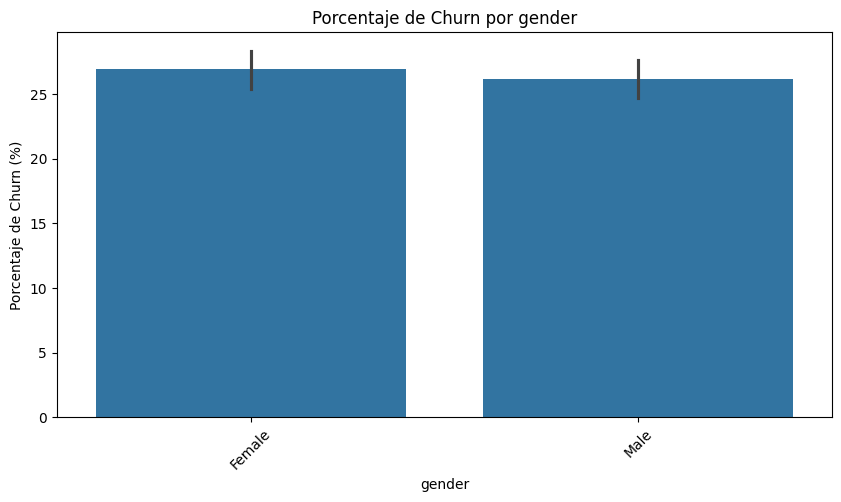


üîπ SeniorCitizen:
SeniorCitizen
1    41.7%
0    23.6%
Name: Churn_bin, dtype: object


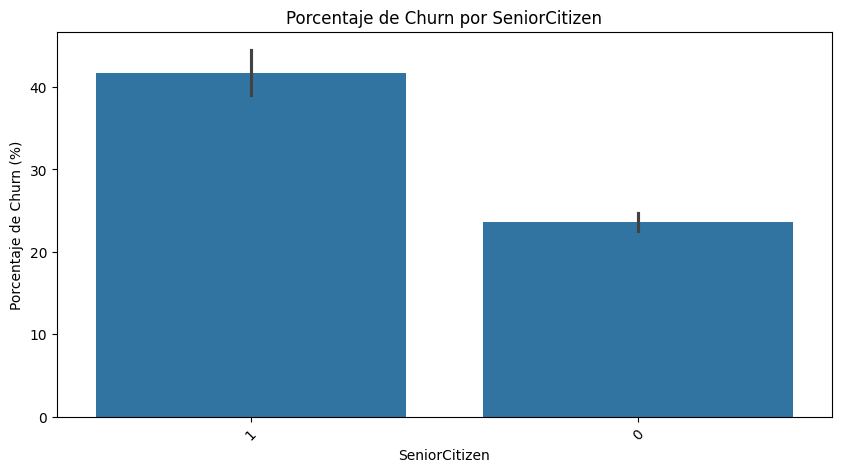


üîπ Partner:
Partner
No     33.0%
Yes    19.7%
Name: Churn_bin, dtype: object


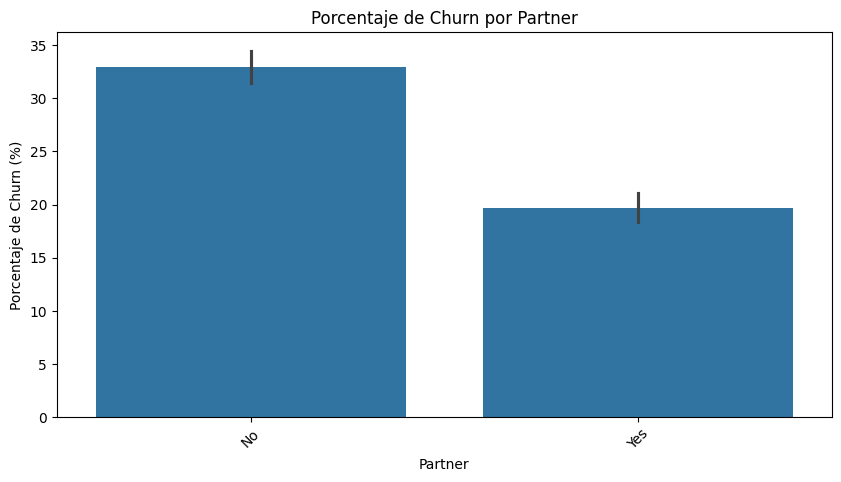


üîπ Dependents:
Dependents
No     31.3%
Yes    15.5%
Name: Churn_bin, dtype: object


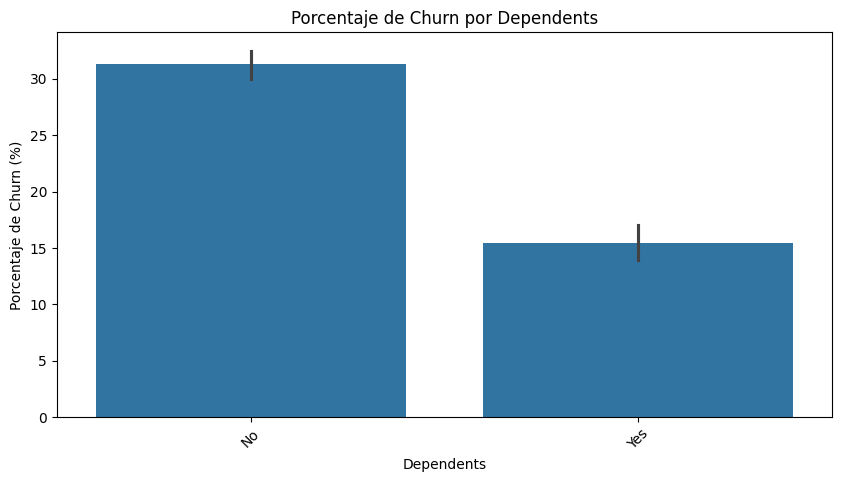


üîπ PhoneService:
PhoneService
Yes    26.7%
No     24.9%
Name: Churn_bin, dtype: object


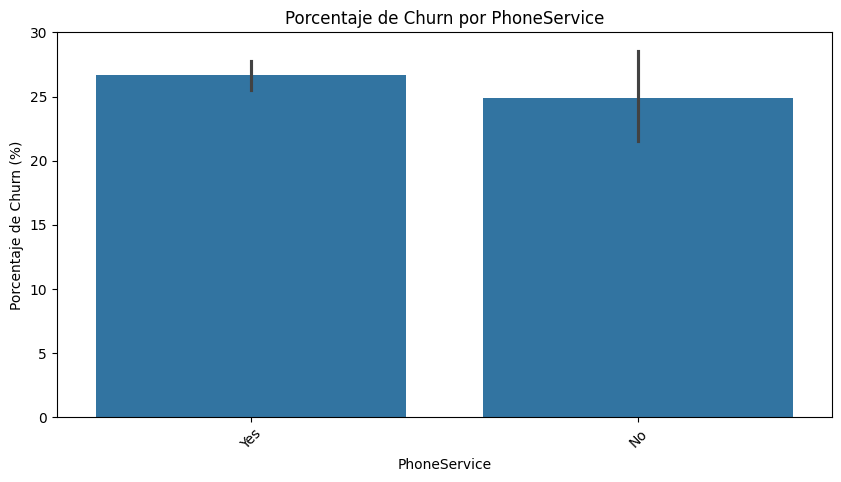


üîπ MultipleLines:
MultipleLines
Yes    28.6%
No     25.0%
Name: Churn_bin, dtype: object


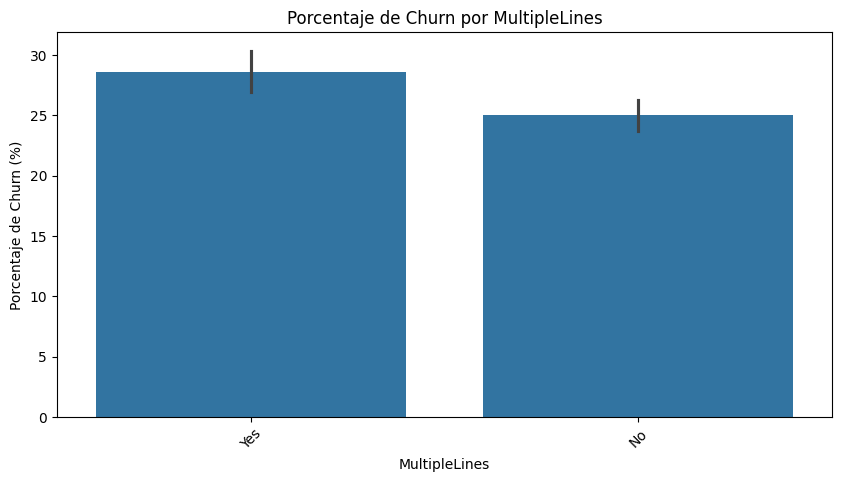


üîπ InternetService:
InternetService
Fiber optic    41.9%
DSL            19.0%
No              7.4%
Name: Churn_bin, dtype: object


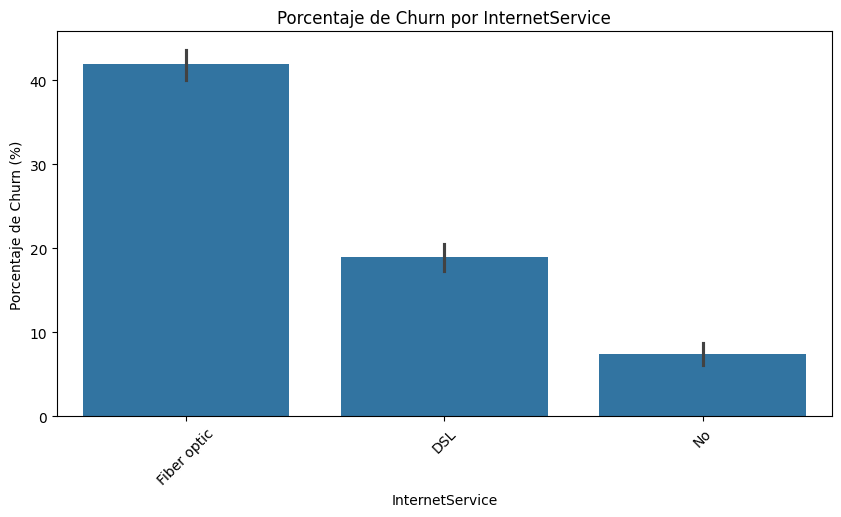


üîπ OnlineSecurity:
OnlineSecurity
No                     41.8%
Yes                    14.6%
No internet service     7.4%
Name: Churn_bin, dtype: object


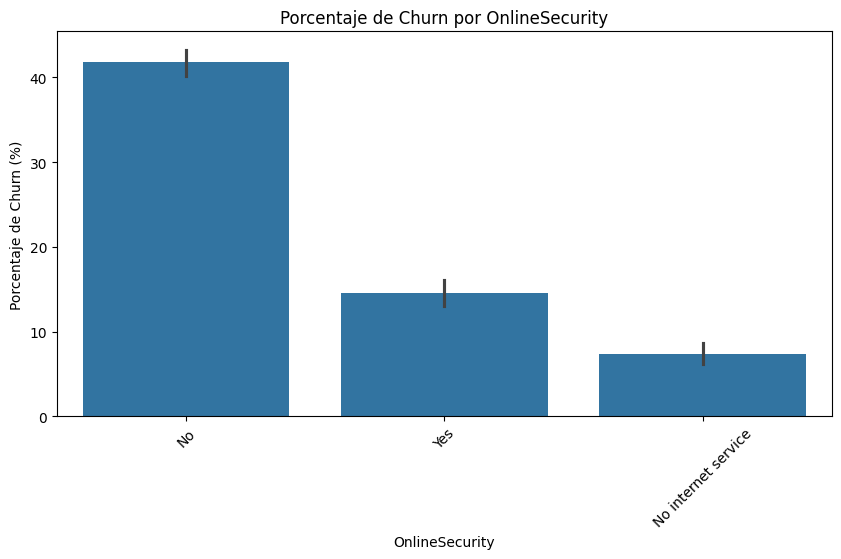


üîπ OnlineBackup:
OnlineBackup
No                     39.9%
Yes                    21.5%
No internet service     7.4%
Name: Churn_bin, dtype: object


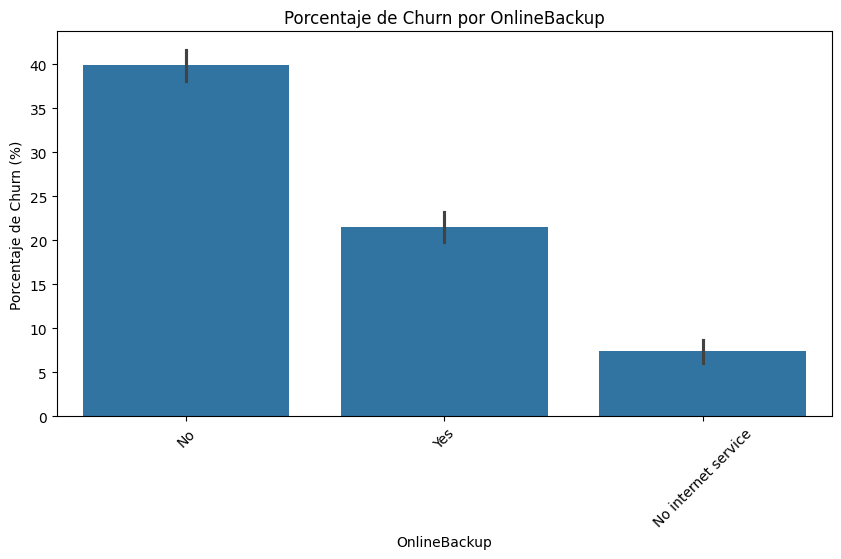


üîπ DeviceProtection:
DeviceProtection
No                     39.1%
Yes                    22.5%
No internet service     7.4%
Name: Churn_bin, dtype: object


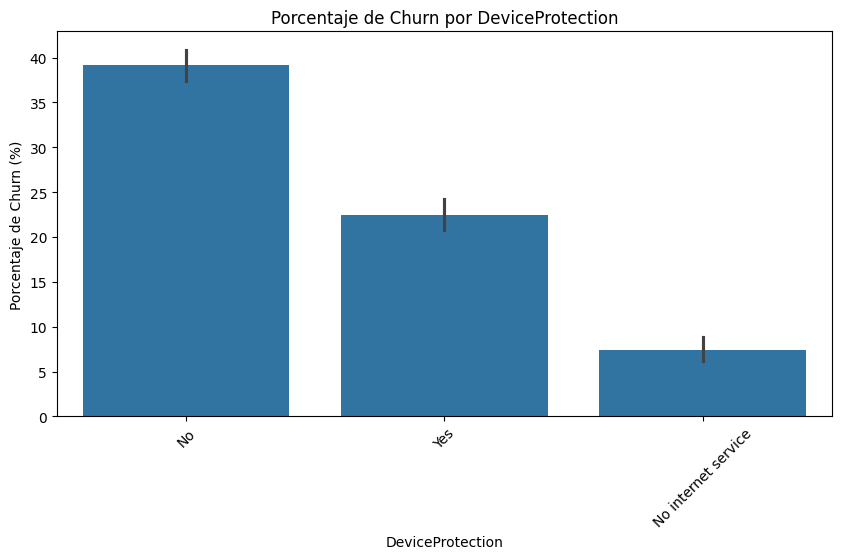


üîπ TechSupport:
TechSupport
No                     41.6%
Yes                    15.2%
No internet service     7.4%
Name: Churn_bin, dtype: object


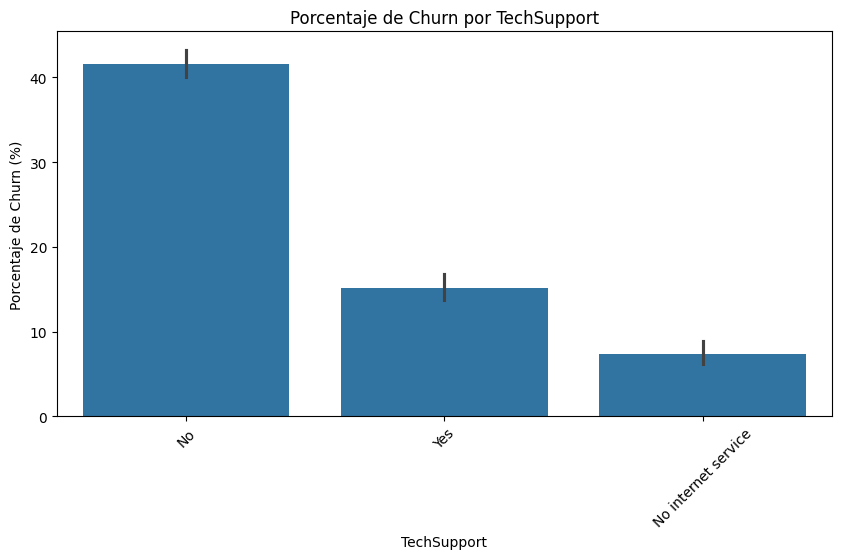


üîπ StreamingTV:
StreamingTV
No                     33.5%
Yes                    30.1%
No internet service     7.4%
Name: Churn_bin, dtype: object


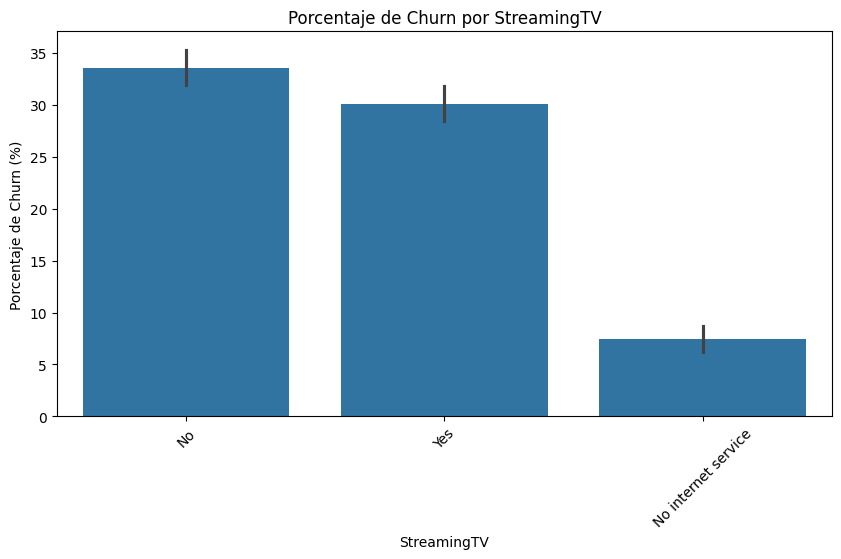


üîπ StreamingMovies:
StreamingMovies
No                     33.7%
Yes                    29.9%
No internet service     7.4%
Name: Churn_bin, dtype: object


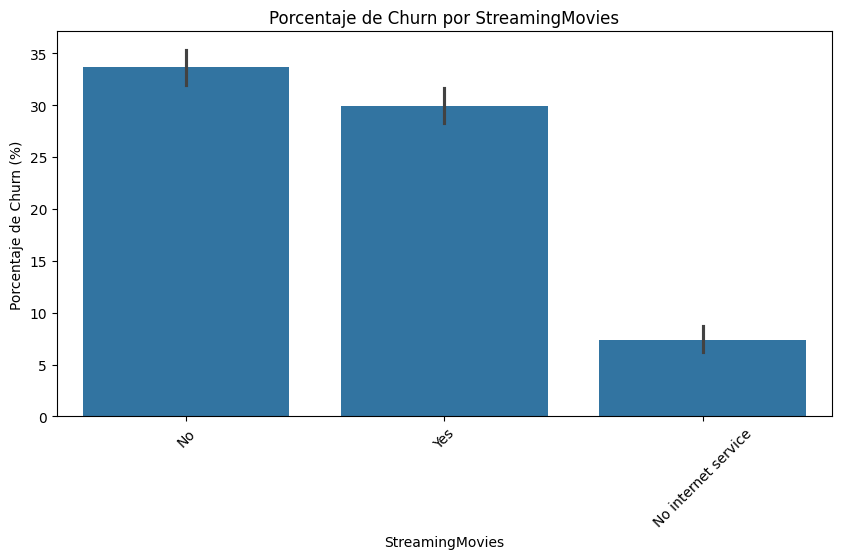


üîπ Contract:
Contract
Month-to-month    42.7%
One year          11.3%
Two year           2.8%
Name: Churn_bin, dtype: object


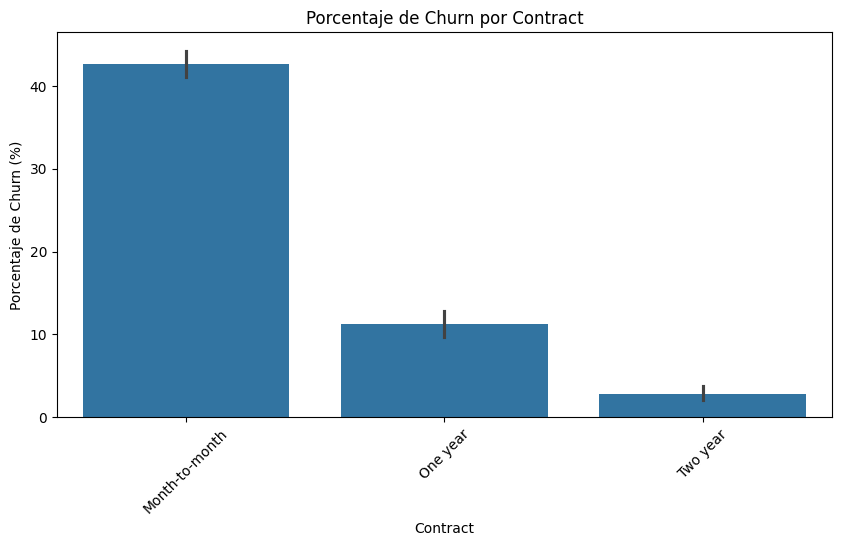


üîπ PaperlessBilling:
PaperlessBilling
Yes    33.6%
No     16.3%
Name: Churn_bin, dtype: object


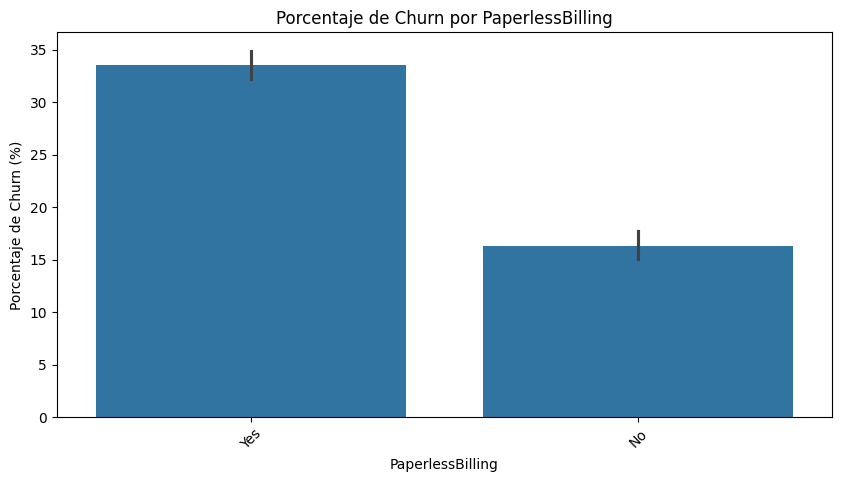


üîπ PaymentMethod:
PaymentMethod
Electronic check             45.3%
Mailed check                 19.1%
Bank transfer (automatic)    16.7%
Credit card (automatic)      15.2%
Name: Churn_bin, dtype: object


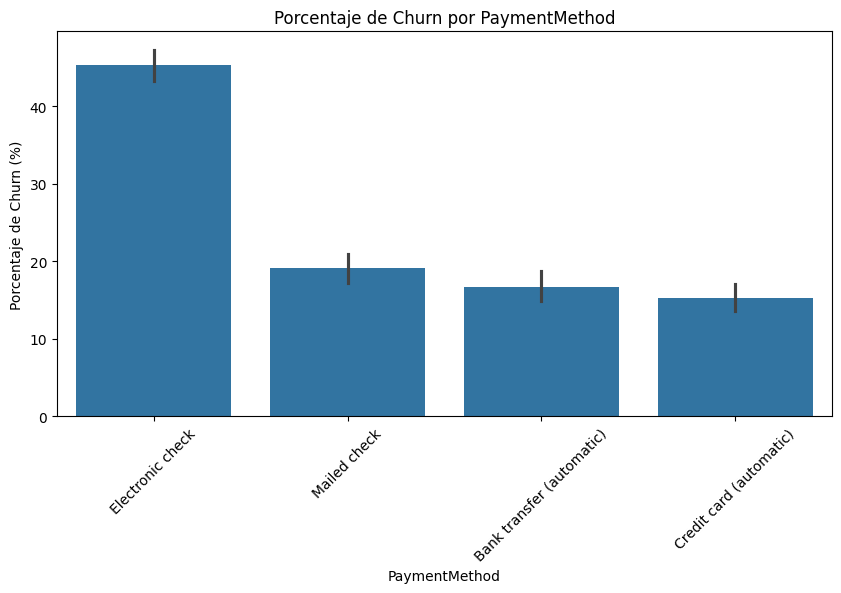

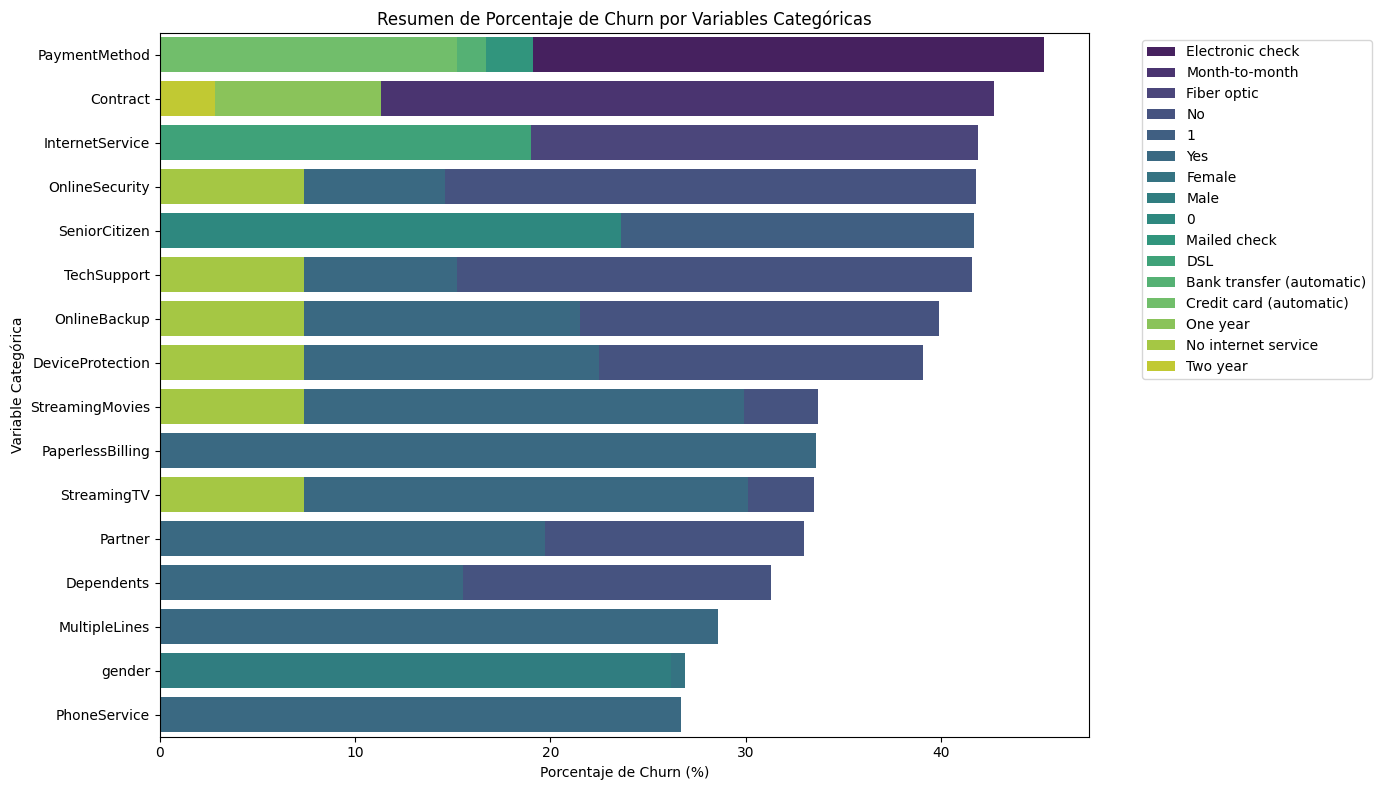

In [69]:
#2. An√°lisis de Porcentaje de Churn por Categor√≠a

import matplotlib.pyplot as plt
import seaborn as sns

print("üìä Porcentaje de Evasi√≥n (Churn) por Variable Categ√≥rica:\n")

# Lista para almacenar todos los datos de churn
churn_data_list = []

for var in categorical_vars:
    # Calculamos el porcentaje de Churn por categor√≠a
    churn_rate = df_normalized.groupby(var)['Churn_bin'].mean() * 100
    churn_rate = churn_rate.sort_values(ascending=False).round(1)

    print(f"\nüîπ {var}:")
    print(churn_rate.astype(str) + "%")

    # Gr√°fico de barras individual
    plt.figure(figsize=(10, 5))
    sns.barplot(x=var, y='Churn_bin', data=df_normalized,
                estimator=lambda x: sum(x)*100/len(x),
                order=churn_rate.index)
    plt.title(f'Porcentaje de Churn por {var}')
    plt.ylabel('Porcentaje de Churn (%)')
    plt.xticks(rotation=45)
    plt.show()

    # Almacenar datos para el gr√°fico resumen
    for category, rate in churn_rate.items():
        churn_data_list.append({'Variable': var, 'Categor√≠a': category, 'Churn Rate': rate})

# Crear DataFrame con todos los datos de churn
churn_summary = pd.DataFrame(churn_data_list)

# Gr√°fico resumen de todas las variables categ√≥ricas
plt.figure(figsize=(14, 8))
sns.barplot(x='Churn Rate', y='Variable', hue='Categor√≠a',
            data=churn_summary.sort_values('Churn Rate', ascending=False),
            dodge=False, palette='viridis')
plt.title('Resumen de Porcentaje de Churn por Variables Categ√≥ricas')
plt.xlabel('Porcentaje de Churn (%)')
plt.ylabel('Variable Categ√≥rica')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Conclusiones e Insights: Resume los principales hallazgos y c√≥mo estos datos pueden ayudar a reducir la evasi√≥n**

Principales Hallazgos y Acciones para Reducir la Evasi√≥n (Churn)
üîç Hallazgos Clave:
M√©todos de Pago

üìâ "Electronic check" tiene 45.3% de Churn (el m√°s alto).

‚úÖ Pagos autom√°ticos (transferencia/tarjeta) tienen ‚â§16.7% Churn.

Tipo de Contrato

üìâ Contrato mensual (Month-to-month): 42.7% Churn.

‚úÖ Contratos anuales/bianuales: Churn ‚â§11.3%.

Servicios Adicionales

üìâ Clientes sin seguridad online (41.8%) o soporte t√©cnico (41.6%) tienen mayor Churn.

‚úÖ Con estos servicios: Churn cae a 14.6% y 15.2% respectivamente.

Perfil Demogr√°fico

üìâ Adultos mayores (SeniorCitizen=1): 41.7% Churn vs 23.6% en menores.

üìâ Clientes sin pareja (Partner=No) o dependientes: +30% Churn.

Internet vs Fibra √ìptica

üìâ Fibra √≥ptica: 41.9% Churn (posiblemente por costo/expectativas).

‚úÖ DSL: Solo 19% Churn.

üöÄ Acciones Recomendadas:
Incentivar Contratos Anuales

Ofrecer descuentos por renovaci√≥n anticipada.

Ejemplo: "10% de descuento al cambiar a plan anual".

Migrar a Pagos Autom√°ticos

Campa√±as para cambiar de "electronic check" a transferencia/tarjeta autom√°tica.

Beneficio: "5% de descuento por pago autom√°tico".

Paquetes con Servicios de Protecci√≥n

Promover OnlineSecurity + TechSupport en combos.

Mensaje: "Protecci√≥n completa: reduce riesgos y mejora tu experiencia".

Programas para Adultos Mayores

Atenci√≥n personalizada y planes especiales para este segmento.

Revisar Estrategia de Fibra √ìptica

Analizar si el alto Churn se debe a problemas t√©cnicos o expectativas no cumplidas.

üìä Impacto Esperado:
Variable	Churn Actual	Meta con Acciones
Contrato Month-to-month	42.7%	Reducir a 30-35%
Electronic check	45.3%	Reducir a 25-30%
Sin OnlineSecurity/Tech	41.8%	Reducir a 20-25%
Beneficio estimado: Reducci√≥n del 10-15% en Churn general, aumentando ingresos recurrentes.

# **ANALISIS EXTRA**
# ¬°Extra! An√°lisis de correlaci√≥n entre variables **texto en negrita**

Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlaci√≥n entre diferentes variables del dataset. Esto puede ayudar a identificar qu√© factores tienen mayor relaci√≥n con la evasi√≥n de clientes, como:

üîπ La relaci√≥n entre la cuenta diaria y la evasi√≥n.
üîπ C√≥mo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la funci√≥n corr() de Pandas para calcular las correlaciones y visualizar los resultados con gr√°ficos de dispersi√≥n o matrices de correlaci√≥n.

Este an√°lisis adicional puede proporcionar insights valiosos para la creaci√≥n de modelos predictivos m√°s robustos. üöÄ

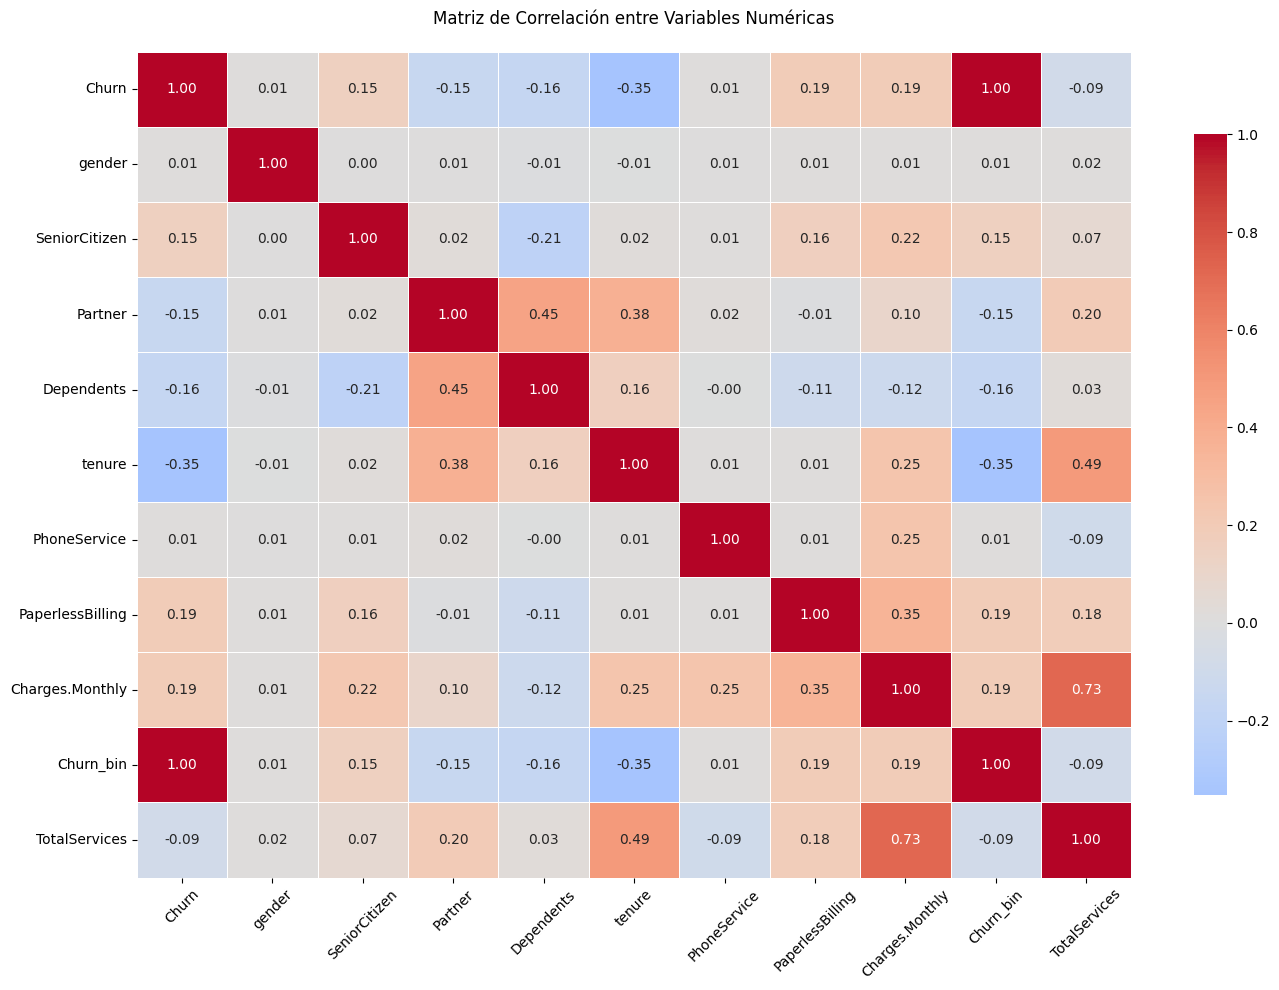

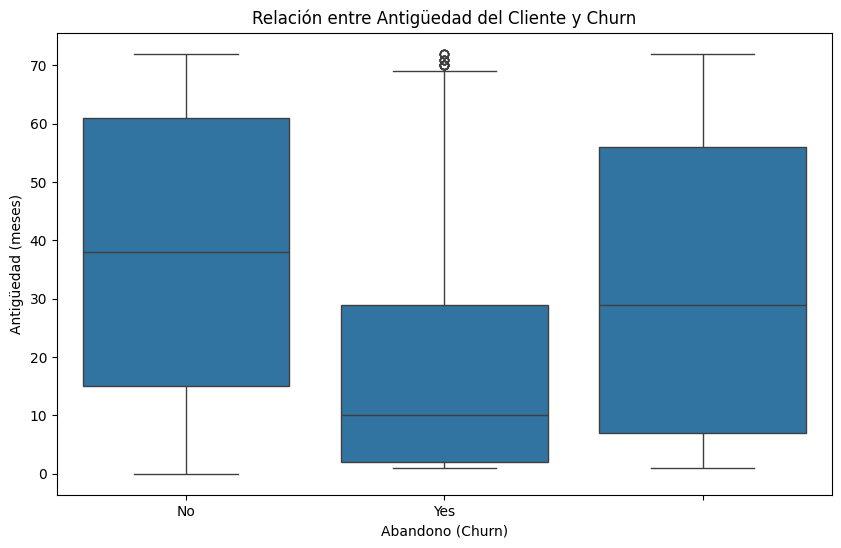

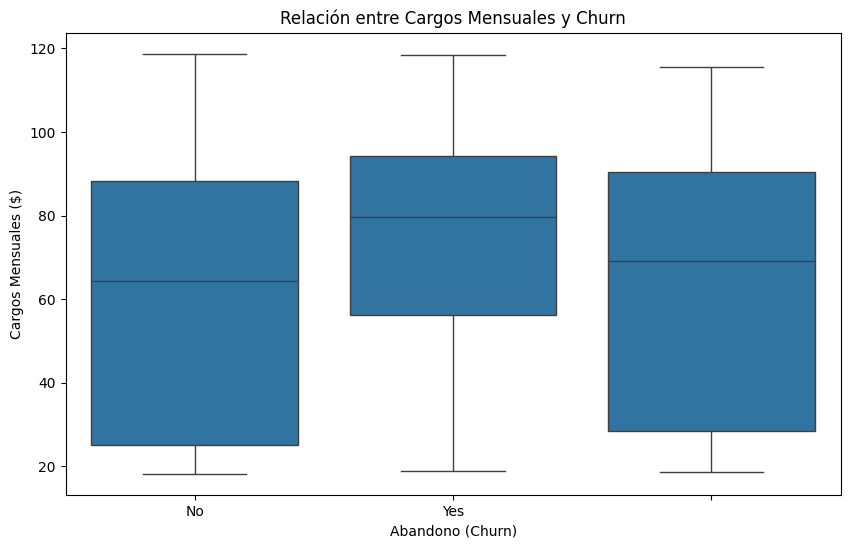


üîç Correlaci√≥n con Churn (ordenado por magnitud):
Churn_bin           1.000000
tenure             -0.352229
Charges.Monthly     0.193356
PaperlessBilling    0.191825
Dependents         -0.164221
SeniorCitizen       0.150889
Partner            -0.150448
TotalServices      -0.087698
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparaci√≥n de datos num√©ricos
# Convertir variables categ√≥ricas relevantes a num√©ricas para el an√°lisis
df_corr = df_normalized.copy()

# Mapear variables binarias
binary_mappings = {
    'Churn': {'Yes': 1, 'No': 0},
    'gender': {'Female': 1, 'Male': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_mappings.items():
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].map(mapping)

# Crear variable de conteo de servicios adicionales
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']
df_corr['TotalServices'] = df_corr[services].apply(lambda x: (x == 'Yes').sum(), axis=1)

# 2. Matriz de correlaci√≥n
corr_matrix = df_corr.select_dtypes(include=['int64', 'float64']).corr()

# 3. Visualizaci√≥n de la matriz de correlaci√≥n
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlaci√≥n entre Variables Num√©ricas', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Gr√°ficos de dispersi√≥n para relaciones clave
# Relaci√≥n entre antig√ºedad (tenure) y Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df_normalized)
plt.title('Relaci√≥n entre Antig√ºedad del Cliente y Churn')
plt.ylabel('Antig√ºedad (meses)')
plt.xlabel('Abandono (Churn)')
plt.show()

# Relaci√≥n entre cargos mensuales y Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_normalized)
plt.title('Relaci√≥n entre Cargos Mensuales y Churn')
plt.ylabel('Cargos Mensuales ($)')
plt.xlabel('Abandono (Churn)')
plt.show()

# 5. Correlaci√≥n espec√≠fica con Churn
print("\nüîç Correlaci√≥n con Churn (ordenado por magnitud):")
churn_corr = corr_matrix['Churn'].sort_values(key=abs, ascending=False)
print(churn_corr[1:])  # Excluye la correlaci√≥n consigo misma

In [76]:
corr_matrix


Churn    gender  SeniorCitizen   Partner  Dependents  \
Churn             1.000000  0.008612       0.150889 -0.150448   -0.164221   
gender            0.008612  1.000000       0.004288  0.005007   -0.012038   
SeniorCitizen     0.150889  0.004288       1.000000  0.022970   -0.212952   
Partner          -0.150448  0.005007       0.022970  1.000000    0.448900   
Dependents       -0.164221 -0.012038      -0.212952  0.448900    1.000000   
tenure           -0.352229 -0.005765       0.018187  0.377551    0.159892   
PhoneService      0.011942  0.005073       0.010060  0.018828   -0.003863   
PaperlessBilling  0.191825  0.011273       0.157734 -0.011201   -0.111752   
Charges.Monthly   0.193356  0.013889       0.220388  0.097122   -0.115832   
Churn_bin         1.000000  0.008612       0.150889 -0.150448   -0.164221   
TotalServices    -0.087698  0.016069       0.068080  0.201616    0.031230   

                    tenure  PhoneService  PaperlessBilling  Charges.Monthly  \
Churn            -0.352229      0.011942          0.191825         0.193356   
gender           -0.005765      0.005073          0.011273         0.013889   
SeniorCitizen     0.018187      0.010060          0.157734         0.220388   
Partner           0.377551      0.018828         -0.011201         0.097122   
Dependents        0.159892     -0.003863         -0.111752        -0.115832   
tenure            1.000000      0.010205          0.007949         0.247982   
PhoneService      0.010205      1.000000          0.013624         0.246709   
PaperlessBilling  0.007949      0.013624          1.000000         0.353714   
Charges.Monthly   0.247982      0.246709          0.353714         1.000000   
Churn_bin        -0.352229      0.011942          0.191825         0.193356   
TotalServices     0.494282     -0.094647          0.184626         0.725037   

                  Churn_bin  TotalServices  
Churn              1.000000      -0.087698  
gender             0.008612       0.016069  
SeniorCitizen      0.150889       0.068080  
Partner           -0.150448       0.201616  
Dependents        -0.164221       0.031230  
tenure            -0.352229       0.494282  
PhoneService       0.011942      -0.094647  
PaperlessBilling   0.191825       0.184626  
Charges.Monthly    0.193356       0.725037  
Churn_bin          1.000000      -0.087698  
TotalServices     -0.087698       1.000000